In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline
mlp.rcParams['figure.dpi']=300
plt.style.use('ggplot')

In [2]:
ind = pd.read_csv("ind30.csv", header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.columns = ind.columns.str.strip() # remove first and last spaces from the attributes' name
pd.set_option("display.max_columns", None) # add this line of code to avoid some columns being omitted
print("Shape of the DataFrame is: ",ind.shape) 
ind.head(20) # As you can see, the DataFrame is structured as a time series

Shape of the DataFrame is:  (1110, 30)


Food    Beer   Smoke   Games   Books   Hshld   Clths    Hlth  \
1926-07  0.0056 -0.0519  0.0129  0.0293  0.1097 -0.0048  0.0808  0.0177   
1926-08  0.0259  0.2703  0.0650  0.0055  0.1001 -0.0358 -0.0251  0.0425   
1926-09  0.0116  0.0402  0.0126  0.0658 -0.0099  0.0073 -0.0051  0.0069   
1926-10 -0.0306 -0.0331  0.0106 -0.0476  0.0947 -0.0468  0.0012 -0.0057   
1926-11  0.0635  0.0729  0.0455  0.0166 -0.0580 -0.0054  0.0187  0.0542   
1926-12 -0.0051 -0.0409  0.0255  0.0217  0.0053  0.0256  0.0060  0.0011   
1927-01 -0.0084  0.0057 -0.0035  0.0187  0.0967  0.0408 -0.0106  0.0505   
1927-02  0.0442  0.1283  0.0149  0.0164  0.0141  0.0457  0.0277  0.0171   
1927-03  0.0209 -0.1356  0.0551  0.0102 -0.0028 -0.0008  0.0090  0.0101   
1927-04  0.0272  0.0285  0.0401 -0.0377 -0.0096  0.0144  0.0595  0.0274   
1927-05  0.0613  0.1162  0.1180  0.0018  0.0313  0.1054  0.0337  0.0412   
1927-06 -0.0222  0.1005 -0.0230 -0.0774  0.1254 -0.0303  0.0117  0.0054   
1927-07  0.0504  0.0459  0.0439  0.0114  0.0178  0.0550  0.0601  0.0984   
1927-08  0.0233 -0.0398  0.0383  0.0620  0.0546  0.0052  0.0156  0.0028   
1927-09  0.0604  0.0701  0.0463  0.0418  0.1004  0.0253  0.0465  0.0565   
1927-10 -0.0246 -0.0080 -0.0032  0.0026  0.0263 -0.0184  0.0965  0.0513   
1927-11  0.0717  0.1029  0.0669  0.0358  0.1662  0.0273  0.0206  0.0368   
1927-12  0.0353  0.1272  0.0103  0.0281  0.0327  0.1031 -0.0015 -0.0046   
1928-01  0.0254  0.0062 -0.0256 -0.0037  0.0516  0.0367  0.0707  0.0269   
1928-02 -0.0296 -0.0522 -0.0597 -0.0089 -0.0175 -0.0001 -0.0245 -0.0138   

          Chems   Txtls   Cnstr   Steel   FabPr   ElcEq   Autos   Carry  \
1926-07  0.0814  0.0039  0.0207  0.0407  0.0543  0.0318  0.1639  0.0102   
1926-08  0.0550  0.0814  0.0472  0.0217  0.0206  0.0210  0.0423  0.0166   
1926-09  0.0533  0.0231 -0.0050  0.0015  0.0036 -0.0056  0.0483  0.0273   
1926-10 -0.0476  0.0100 -0.0455 -0.0385  0.0111 -0.0573 -0.0793 -0.0556   
1926-11  0.0520  0.0311  0.0220  0.0386  0.0318  0.0508 -0.0066  0.0787   
1926-12  0.0537  0.0643  0.0352  0.0375  0.0502 -0.0247  0.1049  0.0248   
1927-01  0.0023 -0.0150 -0.0189 -0.0039  0.0119 -0.0102 -0.0081 -0.0061   
1927-02  0.0969  0.0774  0.0417  0.0367  0.0785  0.0430  0.0956  0.0460   
1927-03  0.0607 -0.0539  0.0346  0.0148 -0.0224  0.0040  0.0156 -0.0176   
1927-04  0.0295  0.0054 -0.0095 -0.0034  0.0182  0.0629  0.0291 -0.0075   
1927-05  0.0385  0.1322  0.0751  0.0322  0.0874  0.0823  0.0554  0.1102   
1927-06 -0.0172  0.0229 -0.0469 -0.0342 -0.0229  0.0347 -0.0337 -0.0390   
1927-07  0.1769  0.0436  0.0635  0.1033  0.0961  0.1469  0.1371  0.1199   
1927-08  0.0210  0.0047 -0.0117  0.0397  0.0090  0.0706  0.0732  0.0397   
1927-09  0.0597  0.0189  0.0456  0.0377  0.0530  0.0011  0.0628  0.0373   
1927-10 -0.0746 -0.0261 -0.0454 -0.0782 -0.0521 -0.0822 -0.0455 -0.0671   
1927-11  0.0904  0.0576  0.0553  0.1244  0.1150  0.1138  0.0677  0.0814   
1927-12 -0.0023  0.0267  0.0005  0.0584  0.0292  0.0119  0.0767  0.0276   
1928-01 -0.0108 -0.0110  0.0184 -0.0242 -0.0124 -0.0101 -0.0315  0.0419   
1928-02  0.0073 -0.0531  0.0158 -0.0272 -0.0276 -0.0146  0.0094 -0.0460   

          Mines    Coal     Oil    Util   Telcm   Servs   BusEq   Paper  \
1926-07  0.0564  0.0154 -0.0140  0.0704  0.0083  0.0922  0.0206  0.0770   
1926-08  0.0055  0.0085  0.0369 -0.0169  0.0217  0.0202  0.0439 -0.0238   
1926-09  0.0174  0.0030 -0.0369  0.0204  0.0241  0.0225  0.0019 -0.0554   
1926-10 -0.0320  0.0223 -0.0104 -0.0263 -0.0011 -0.0200 -0.0109 -0.0508   
1926-11  0.0846 -0.0048  0.0006  0.0371  0.0163  0.0377  0.0364  0.0384   
1926-12  0.0183  0.0143  0.0294 -0.0017  0.0199  0.0621  0.0724 -0.0463   
1927-01  0.0417 -0.0306  0.0167 -0.0179  0.0188  0.0208 -0.0145 -0.0260   
1927-02  0.0520  0.0564  0.0113  0.0453  0.0397  0.0890  0.0485  0.0546   
1927-03  0.0444  0.0545 -0.0701  0.0037  0.0556 -0.0780  0.0429 -0.0967   
1927-04  0.0302  0.0095 -0.0578  0.0171 -0.0213  0.0344  0.0310  0.0493   
1927-05  0.0025  0.0319  0.0500  0

## Expected Returns and the Covariance Matrix
Generating the efficient frontier requires a set of expected returns and a covariance matrix. For now, let's assume that we can estiamte these simply by looking back in time and naively assuming they will hold in the future. Clearly, they will not, but we will have plenty of time to dig into that in future lectures. For the moment, assume that our naive method of estimating these parameters will suffice.

We can generate an estimation of expected returns using the annualize_rets() function, that returns a vector of expected returns. For instance, let's generate the set of expected returns based on historic returns from the 5 year period from 1996 through 2000:

In [3]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [4]:
er = annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [5]:
ind['1996':'2000']

Food    Beer   Smoke   Games   Books   Hshld   Clths    Hlth  \
1996-01  0.0342  0.0326  0.0182  0.0469 -0.0049  0.0285 -0.0236  0.0595   
1996-02  0.0162  0.0561  0.0318  0.0179  0.0233 -0.0044  0.0187 -0.0107   
1996-03 -0.0382  0.0190 -0.0768  0.0108  0.0027  0.0130  0.1149  0.0024   
1996-04 -0.0032 -0.0089 -0.0160  0.0237  0.0285  0.0388  0.0541 -0.0060   
1996-05  0.0550  0.0969  0.0548  0.0279  0.0349  0.0325  0.0805  0.0393   
1996-06  0.0238  0.0654  0.0368 -0.0259 -0.0046  0.0122  0.0012 -0.0019   
1996-07 -0.0245 -0.0578  0.0020 -0.1182 -0.0700 -0.0332 -0.0433 -0.0606   
1996-08 -0.0040  0.0214 -0.1318  0.0030  0.0363  0.0169  0.0577  0.0419   
1996-09  0.0876  0.0073  0.0141  0.0743  0.0232  0.0634  0.0715  0.0734   
1996-10  0.0255  0.0078  0.0331 -0.0169  0.0047  0.0105 -0.0025 -0.0068   
1996-11  0.0577  0.0274  0.1074  0.0830  0.0558  0.0540 -0.0049  0.0666   
1996-12 -0.0217  0.0052  0.0930 -0.0643 -0.0210  0.0039  0.0265 -0.0266   
1997-01  0.0289  0.1136  0.0463  0.0359  0.0075  0.0643  0.0644  0.0955   
1997-02  0.0279  0.0274  0.1247 -0.0026  0.0239  0.0287  0.0312  0.0094   
1997-03 -0.0120 -0.0653 -0.1354 -0.0320  0.0071 -0.0606 -0.0566 -0.0740   
1997-04  0.0337  0.1137  0.0324  0.0275 -0.0076  0.0845 -0.0410  0.0616   
1997-05  0.0257  0.0643  0.0998  0.0560  0.0706  0.0815  0.0501  0.0691   
1997-06  0.0654  0.0007  0.0267  0.0141  0.0610  0.0417  0.0360  0.0889   
1997-07  0.0571  0.0185  0.0130  0.0178  0.0486  0.0443  0.0311  0.0206   
1997-08 -0.0415 -0.1261 -0.0304 -0.0251 -0.0254 -0.0826 -0.0618 -0.0614   
1997-09  0.0639  0.0811 -0.0278  0.0510  0.0722  0.0511  0.0507  0.0661   
1997-10 -0.0153 -0.0595 -0.0416 -0.0027 -0.0099 -0.0371 -0.0795  0.0026   
1997-11  0.0749  0.0729  0.0865  0.0748  0.0393  0.0553  0.0148  0.0286   
1997-12  0.0323  0.0420  0.0538  0.0251  0.0622  0.0298 -0.0897  0.0355   
1998-01 -0.0380 -0.0203 -0.0735  0.0637 -0.0066  0.0080  0.0041  0.0573   
1998-02  0.0445  0.0469  0.0450  0.0577  0.0631  0.0910  0.1162  0.0545   
1998-03  0.0423  0.1245 -0.0326 -0.0040  0.0532  0.0424  0.0426  0.0361   
1998-04 -0.0321 -0.0308 -0.1083  0.0863  0.0162  0.0106  0.0271  0.0192   
1998-05  0.0108  0.0288  0.0059 -0.0651 -0.0077 -0.0121 -0.0078 -0.0247   
1998-06 -0.0025  0.0671  0.0552 -0.0260  0.0597  0.0367  0.0215  0.0618   
1998-07 -0.0777 -0.0449  0.1037 -0.0237 -0.0271 -0.0348 -0.1018 -0.0022   
1998-08 -0.0896 -0.1976 -0.0520 -0.2216 -0.1040 -0.1092 -0.2215 -0.1226   
1998-09  0.0437 -0.0502  0.1246 -0.0138 -0.0033 -0.0511  0.0253  0.1201   
1998-10  0.0920  0.1576  0.1082  0.0696  0.0737  0.1854  0.0686  0.0385   
1998-11  0.0434  0.0579  0.0915  0.1257  0.0836  0.0109  0.0336  0.0618   
1998-12 -0.0164 -0.0031 -0.0304 -0.0308  0.0945  0.0540  0.0380  0.0502   
1999-01 -0.0379 -0.0165 -0.1221  0.0819 -0.0098 -0.0209  0.0697  0.0024   
1999-02 -0.0375 -0.0134 -0.1597  0.0505 -0.0016 -0.0127  0.0195  0.0023   
1999-03 -0.0330 -0.0165 -0.0893 -0.0501  0.0293  0.0495  0.0149  0.0255   
1999-04  0.0099  0.0503  0.0007  0.0489  0.0580  0.0423  0.0860 -0.0554   
1999-05  0.0388 -0.0063  0.0996 -0.0555 -0.0146 -0.0301 -0.0255 -0.0205   
1999-06  0.0069 -0.0431  0.0486  0.0546  0.0403  0.0133  0.0159  0.0449   
1999-07 -0.0390  0.0026 -0.0688 -0.0657 -0.0042 -0.0106 -0.0989 -0.0444   
1999-08 -0.0229 -0.0385  0.0055 -0.0187 -0.0944  0.0262 -0.1112  0.0373   
1999-09 -0.0472 -0.1494 -0.0691 -0.0310  0.0133 -0.0976  0.0470 -0.0709   
1999-10  0.0870  0.1641 -0.2493  0.0136  0.1015  0.1153  0.0025  0.1078   
1999-11 -0.0672  0.0885  0.0352  0.0662 -0.0809  0.0012 -0.1036  0.0150   
1999-12 -0.0567 -0.0883 -0.1015  0.0710  0.1276  0.0417  0.0392 -0.0564   
2000-01 -0.0829 -0.0228 -0.0862  0.0229 -0.0092 -0.0651 -0.1138  0.0756   
2000-02 -0.0689 -0.1164 -0.0401 -0.0177 -0.0071 -0.1157 -0.1278 -0.0288   
2000-03  0.0969  0.0013  0.0511  0.1052  0.1293 -0.1426  0.2506  0.0028   
2000-04 -0.0390  0.0368  0.0379  0.0220 -0.0734  0.0429  0.0430  0.0525   
2000-05  0.1565  0.1187  0.1951  0.0

In [6]:
er

Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
Hshld    0.134766
Clths    0.079160
Hlth     0.246641
Chems    0.077456
Txtls   -0.042721
Cnstr    0.084076
Steel    0.115809
FabPr    0.108280
ElcEq    0.272420
Autos    0.080954
Carry    0.173904
Mines   -0.053554
Coal     0.414689
Oil      0.165377
Util     0.145903
Telcm    0.122771
Servs    0.175264
BusEq    0.271952
Paper    0.097163
Trans    0.071099
Whlsl    0.126431
Rtail    0.207247
Meals    0.067400
Fin      0.223371
Other    0.043349
dtype: float64

In [7]:
def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5

## Simulation

### Two asset case

In [8]:
def sim_ef2(n_points, er, cov):
    """
    Simulates the 2-asset portfolio returns and volatility
    """
    if er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2-asset frontiers")
    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    plt.figure()
    ef.plot.line(x="Volatility", y="Returns", style=".-", xlim=[min(vols)*0.9,max(vols)*1.1])

<Figure size 1920x1440 with 0 Axes>

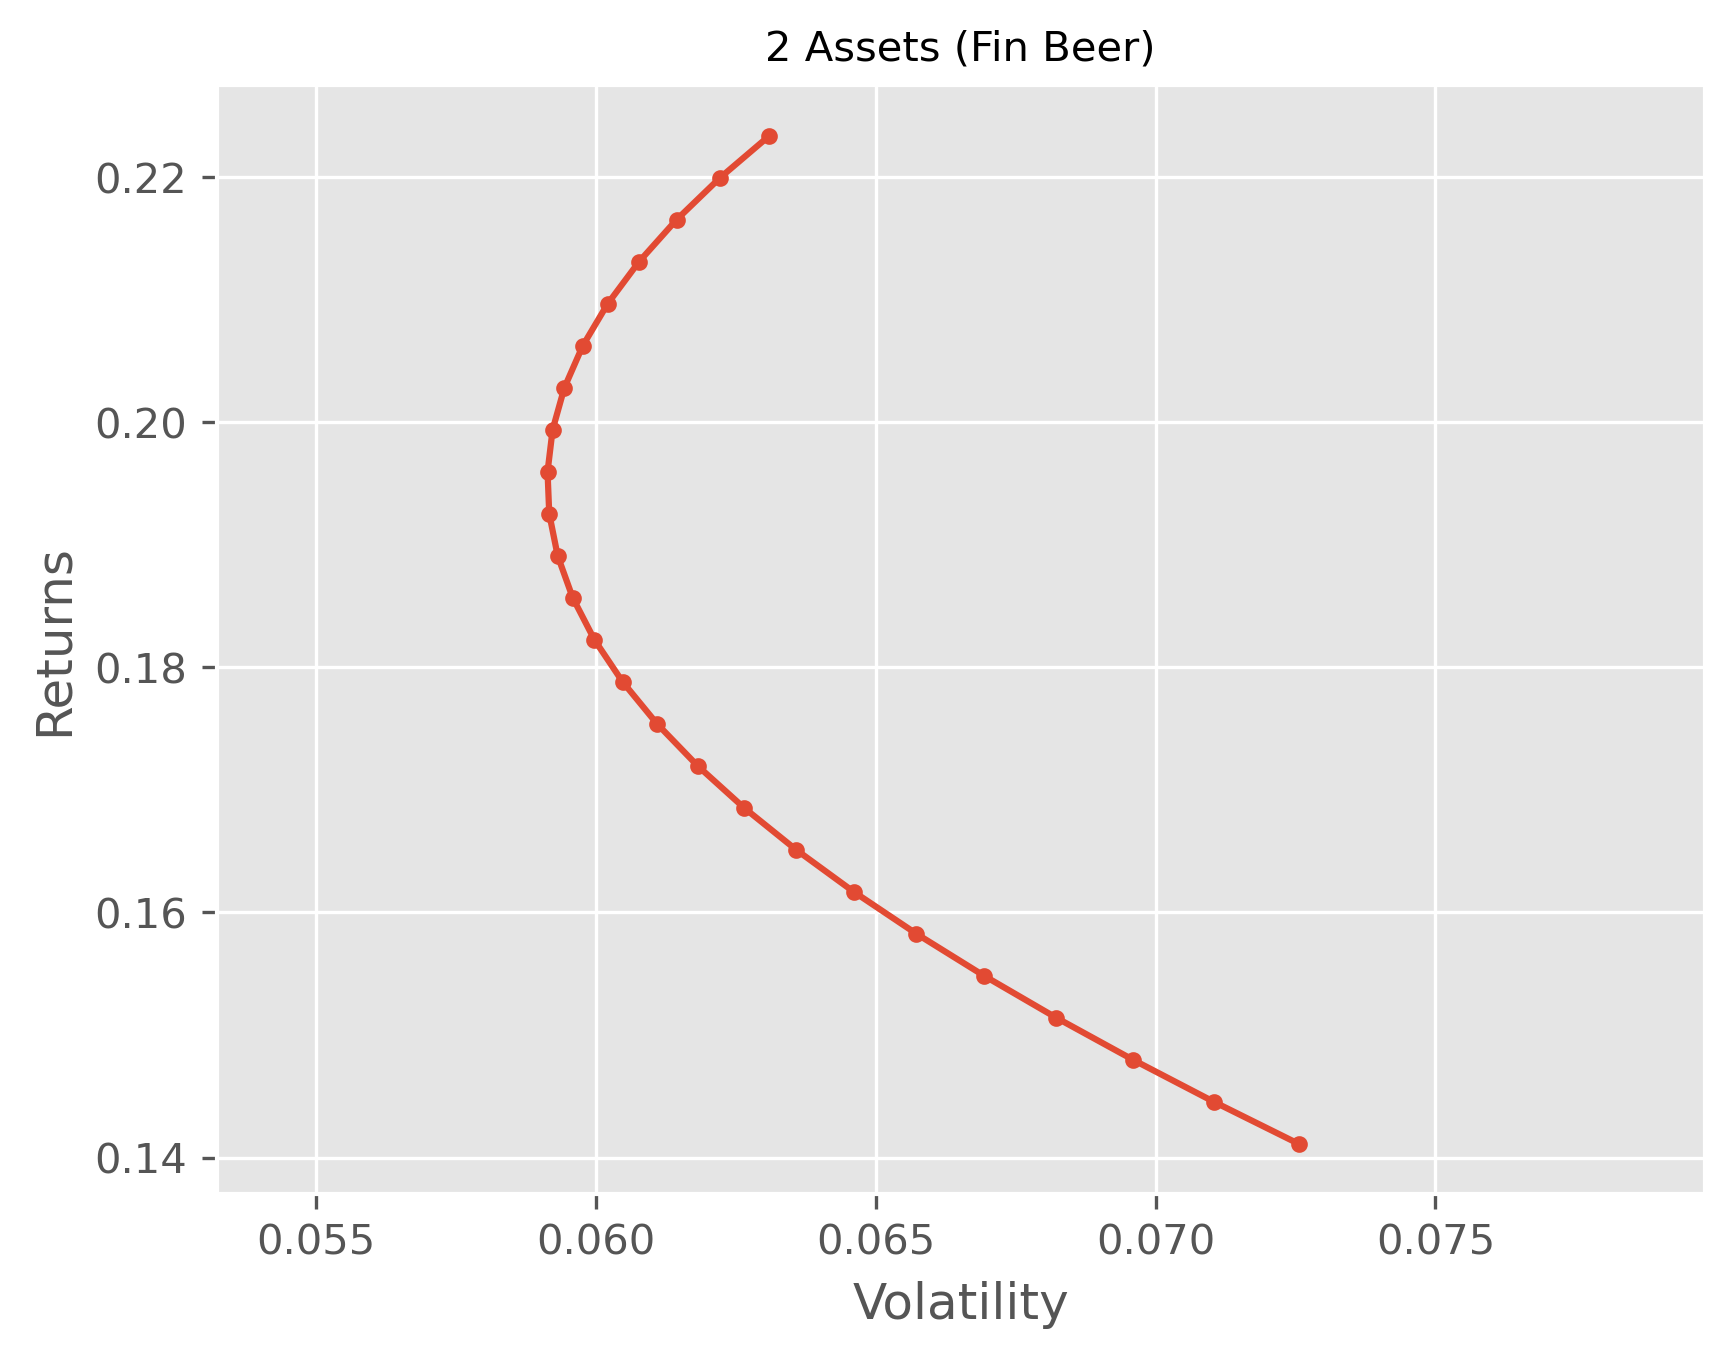

In [9]:
l = ["Fin", "Beer"]
sim_ef2(25, er[l].values, cov.loc[l,l])
title = f"{len(l)} Assets ({' '.join(l)})"
plt.title(title, fontsize=10)
plt.ylabel('Returns')
plt.legend('', frameon=False)

### Multiple Assets Simulation (Required)

In [10]:
def sim_efn(n_points, er, cov, plot=False, ax=None, color='C1', size=2, linstyle='.-', label=None):
    """
    Simulates the n-asset portfolio returns and volatility (n>=2)
    """
    n_assets = er.shape[0]
    
    if n_assets < 2:
        raise ValueError("At least two assets are required.")
    elif n_assets == 2:
        weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
    else:
        weights = np.random.dirichlet(np.ones(n_assets), n_points)
        
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
        
    if plot and bool(ax):
        
        if n_assets == 2:
            ef.plot.line(x="Volatility", y="Returns", style=linstyle, ylabel="Returns", ax=ax,\
                         c=color, markersize=size, label=label, legend=bool(label)) 
        elif n_assets >2:
            ef.plot.scatter(x="Volatility", y="Returns", ax=ax, c='None', edgecolors=color, facecolors='none', s=size, label=label)
        
        ax.autoscale()
        xlim_min, xlim_max = ax.get_xlim()
        ax.set_xlim(left=xlim_min*0.9, right=xlim_max*1.1)
    
    elif plot:
        
        if n_assets == 2:
            ef.plot.line(x="Volatility", y="Returns", style=linstyle, ylabel="Returns", xlim=[min(vols)*0.9,max(vols)*1.1],\
                     c=color, markersize=size, marker=',', label=label, legend=bool(label)) 
        elif n_assets >2:
            ef.plot.scatter(x="Volatility", y="Returns", xlim=[min(vols)*0.9,max(vols)*1.1], c='None', edgecolors=color, facecolors='none', s=size, label=label)
        
    return ef

Text(0.5, 1.0, '3 Assets (Fin Beer Util), 6000 Simulations')

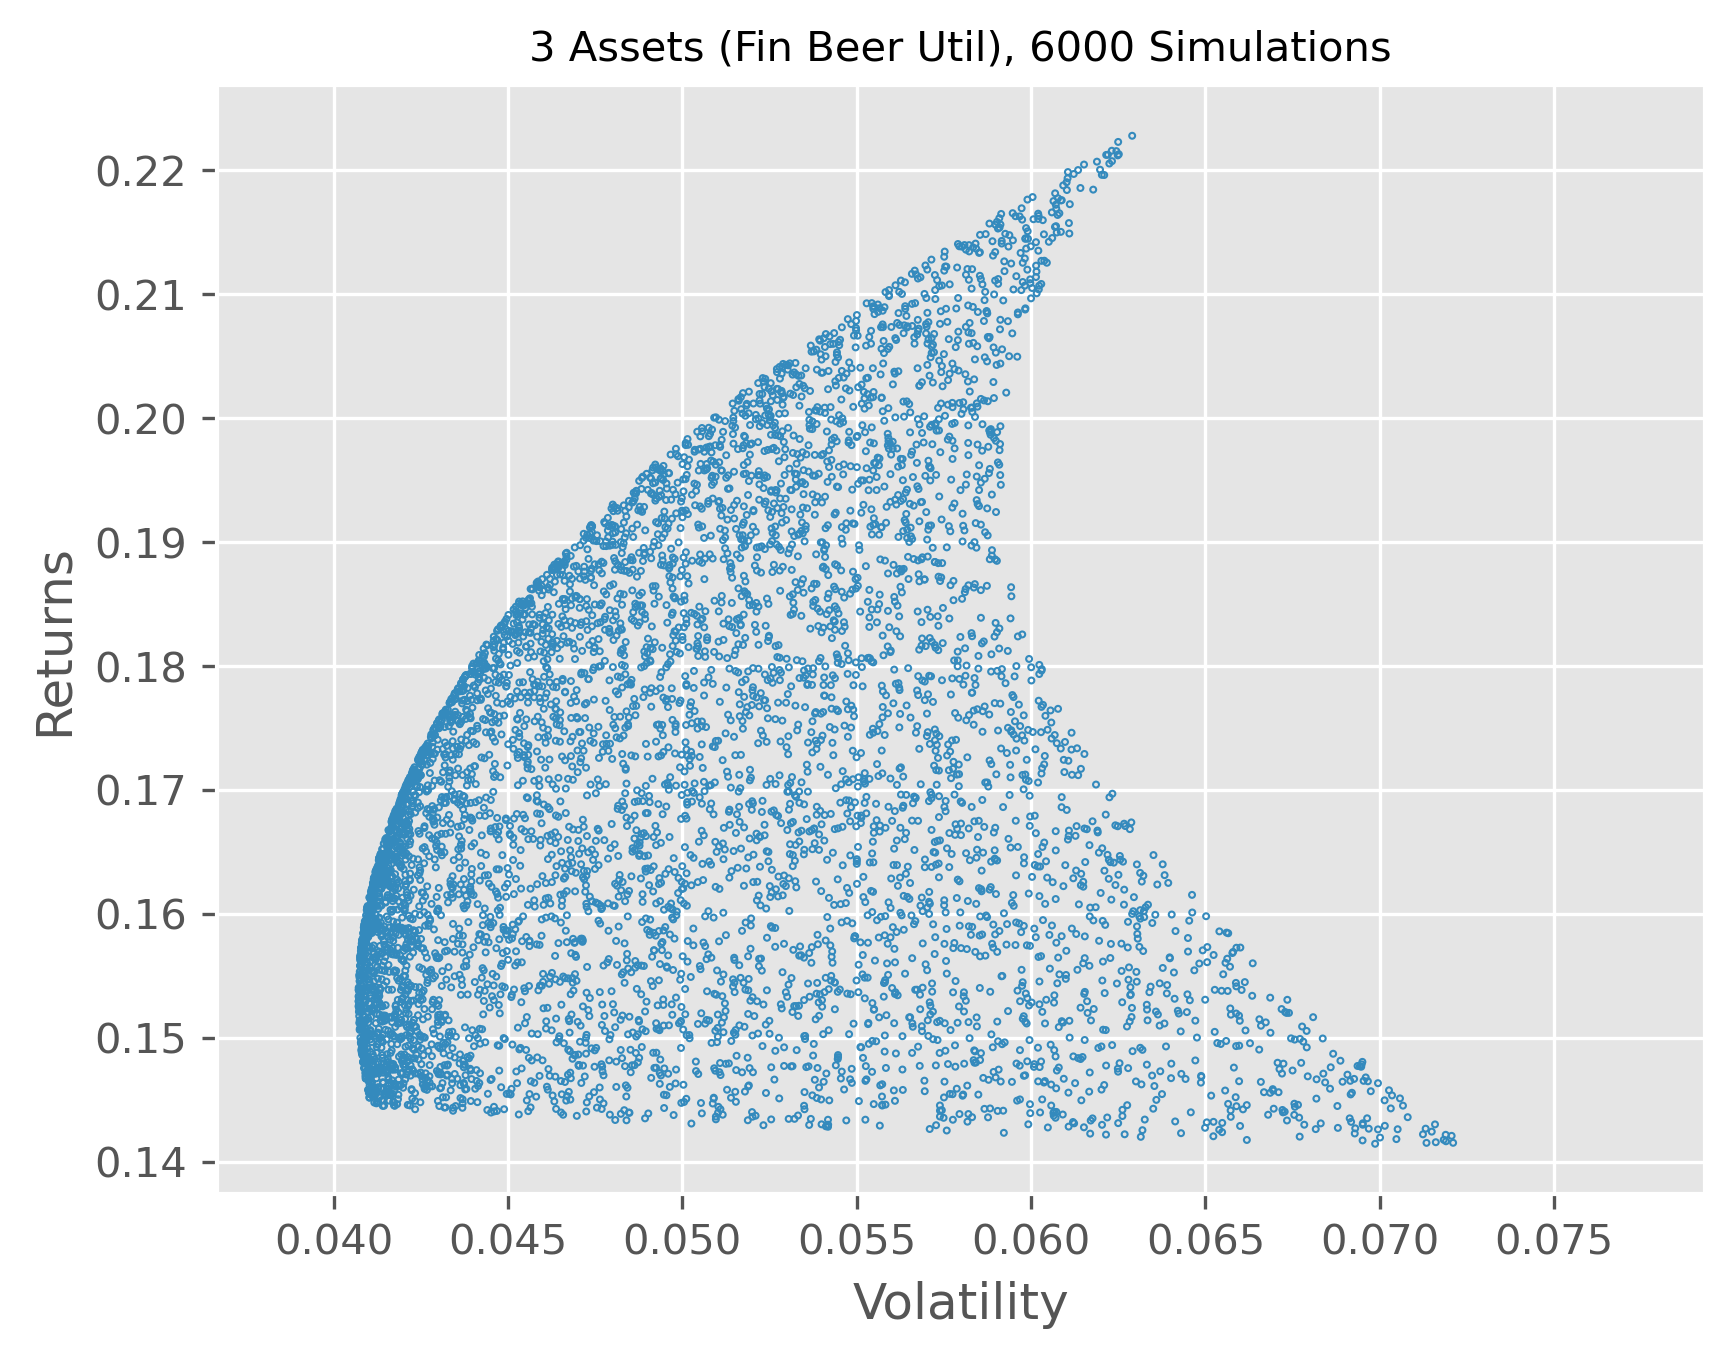

In [11]:
l = ["Fin", "Beer", "Util"]

n_sims = 6000
title = f"{len(l)} Assets ({' '.join(l)}), {n_sims} Simulations"
sim_efn(n_points=n_sims, er=er[l].values, cov=cov.loc[l,l].values, plot=True)
plt.title(title, fontsize=10)


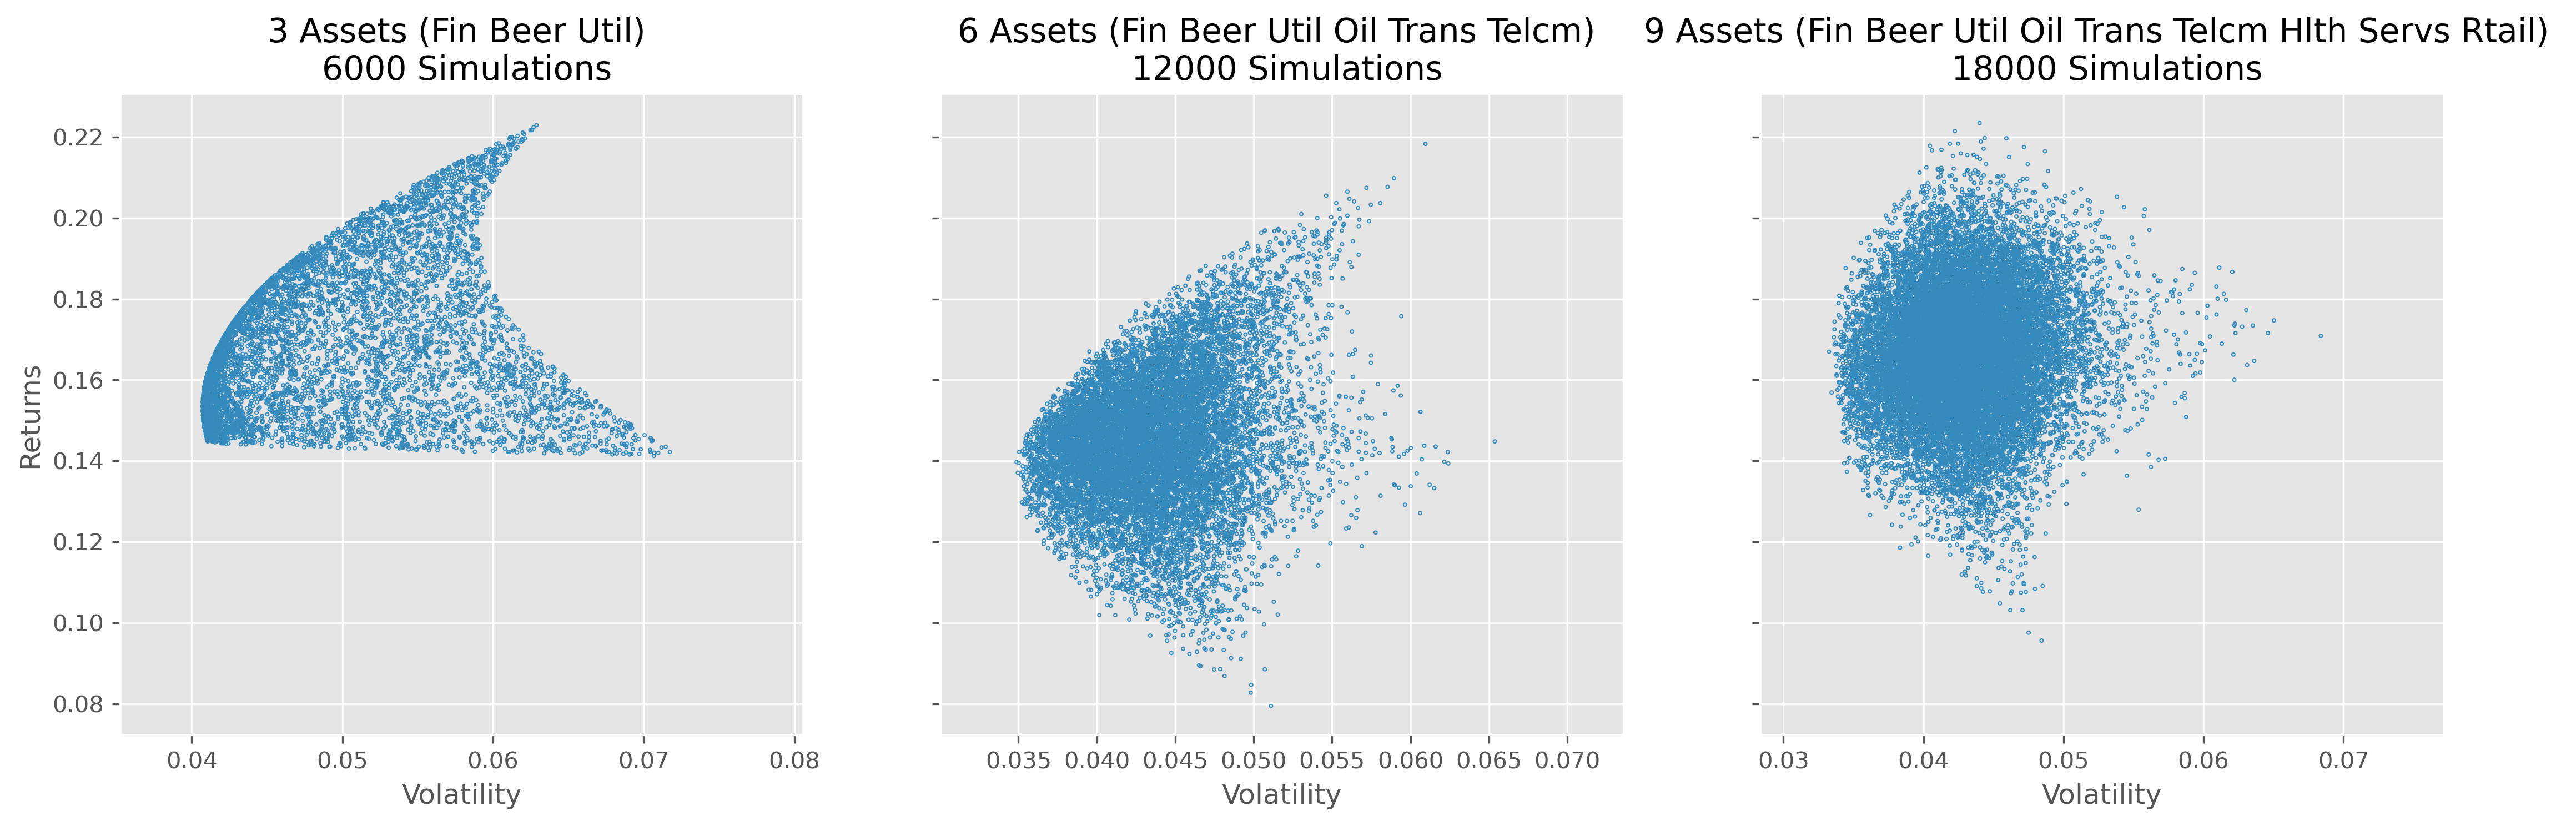

In [12]:
lst = ["Fin", "Beer", "Util", "Oil", "Trans", "Telcm", "Hlth", "Servs", "Rtail"]


fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

for i in range(3):
    ind = (i+1) * 3
    l = lst[:ind]
    n_sims = 2000 * len(l)
    label = ' '.join(l)
    title = f'{len(l)} Assets ({label}) \n {n_sims} Simulations'
    sim_efn(n_points=n_sims, er=er[l].values, cov=cov.loc[l,l].values, plot=True, ax=axes[i])
    axes[i].set_title(title)
    axes[i].set(adjustable='box')

## Optimization (Bonus Question)

Using Mean-Variance Optimization approach to achieve the efficient frontier (minimize standard deviation given each expected return level) by changing weights of your assets. 

You need three or more than three asset inputs for this question.

Then draw the efficient frontier.

In [13]:
!pip install qpsolvers

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [14]:
!python -m pip install -i https://pypi.gurobi.com gurobipy

Looking in indexes: https://pypi.gurobi.com


In [15]:
import qpsolvers

print(qpsolvers.available_solvers)

if not bool(qpsolvers.available_solvers):
    print('Please restart the kernel to reload the qgsolvers package.')

['cvxopt', 'ecos', 'gurobi', 'proxqp', 'qpoases', 'quadprog', 'scs']


In [16]:
from qpsolvers import solve_qp

def opt_efn(n_points, er, cov, assets_name=None, plot=False, ax=None, color='C1', size=0.5, linstyle='.-', label=None):
    
    """
    Generate the efficient frontier for an n-asset portfolio(n>2) by optimization.
    """
    
    n_assets = er.shape[0]
    
    if n_assets < 2:
        raise ValueError("At least two assets are required.")
    
    if bool(assets_name) and (len(assets_name) != n_assets):
        raise ValueError("The dimension of assets return and assets names does not match.")
    
    
    r_min = er.min()
    r_max = er.max()
    
    i=0
    for r in np.linspace(r_min, r_max, n_points):
        P = cov
        q = np.zeros(n_assets)
        G = -np.eye(n_assets)
        h = np.zeros(n_assets)
        A = np.vstack([er, np.ones(n_assets)])
        b = np.hstack([r, np.ones(1)])
        lb = np.zeros(n_assets)
        ub = np.ones(n_assets)
        w = solve_qp(P=P, q=q, G=G, h=h, A=A, b=b, lb=lb, ub=ub, solver='gurobi')
        if i == 0:
            weights_opt = w
        else:
            weights_opt = np.vstack([weights_opt, w])
        i += 1
    
    rets = np.linspace(r_min, r_max, n_points)
    vols = [portfolio_vol(w, cov) for w in weights_opt]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols,
    })
    
    if plot and bool(ax): 
        ef.plot.line(x="Volatility", y="Returns", style=linstyle, ylabel="Returns",\
                     c=color, markersize=size, ax=ax, label=label, legend=bool(label))
        ax.autoscale()
        xlim_min, xlim_max = ax.get_xlim()
        ax.set_xlim(left=xlim_min*0.9, right=xlim_max*1.1)
        
    elif plot:
        ef.plot.line(x="Volatility", y="Returns", style=linstyle, ylabel="Returns", xlim=[min(vols)*0.9,max(vols)*1.1],\
                     c=color, markersize=size, label=label, legend=bool(label)) 
        
        
    if bool(assets_name):
        weight_opt = pd.DataFrame(weights_opt, columns=[f'weight_{name}' for name in assets_name])
    else:
        weight_opt = pd.DataFrame(weights_opt, columns=[f'weight_{i}' for i in range(1, n_assets+1)])
    
    ef = pd.concat([ef, weight_opt], axis=1)
    
    return ef

Restricted license - for non-production use only - expires 2024-10-28
      Returns  Volatility    weight_Fin   weight_Beer   weight_Util
0    0.141126    0.072554  2.818079e-15  1.000000e+00  2.158188e-14
1    0.141401    0.068933  7.265445e-09  9.424264e-01  5.757364e-02
2    0.141676    0.065414  1.316936e-09  8.848525e-01  1.151475e-01
3    0.141951    0.062015  2.425508e-09  8.272787e-01  1.727213e-01
4    0.142226    0.058755  8.371537e-09  7.697051e-01  2.302949e-01
..        ...         ...           ...           ...           ...
295  0.222271    0.062452  9.857970e-01  2.744276e-08  1.420295e-02
296  0.222546    0.062614  9.893478e-01  1.590869e-08  1.065222e-02
297  0.222821    0.062775  9.928986e-01  7.007719e-07  7.100748e-03
298  0.223096    0.062937  9.964493e-01  1.171078e-06  3.549502e-03
299  0.223371    0.063100  1.000000e+00  4.012432e-15  1.190517e-14

[300 rows x 5 columns]


Text(0.5, 1.0, '3 Assets (Fin Beer Util), 300 Optimizations')

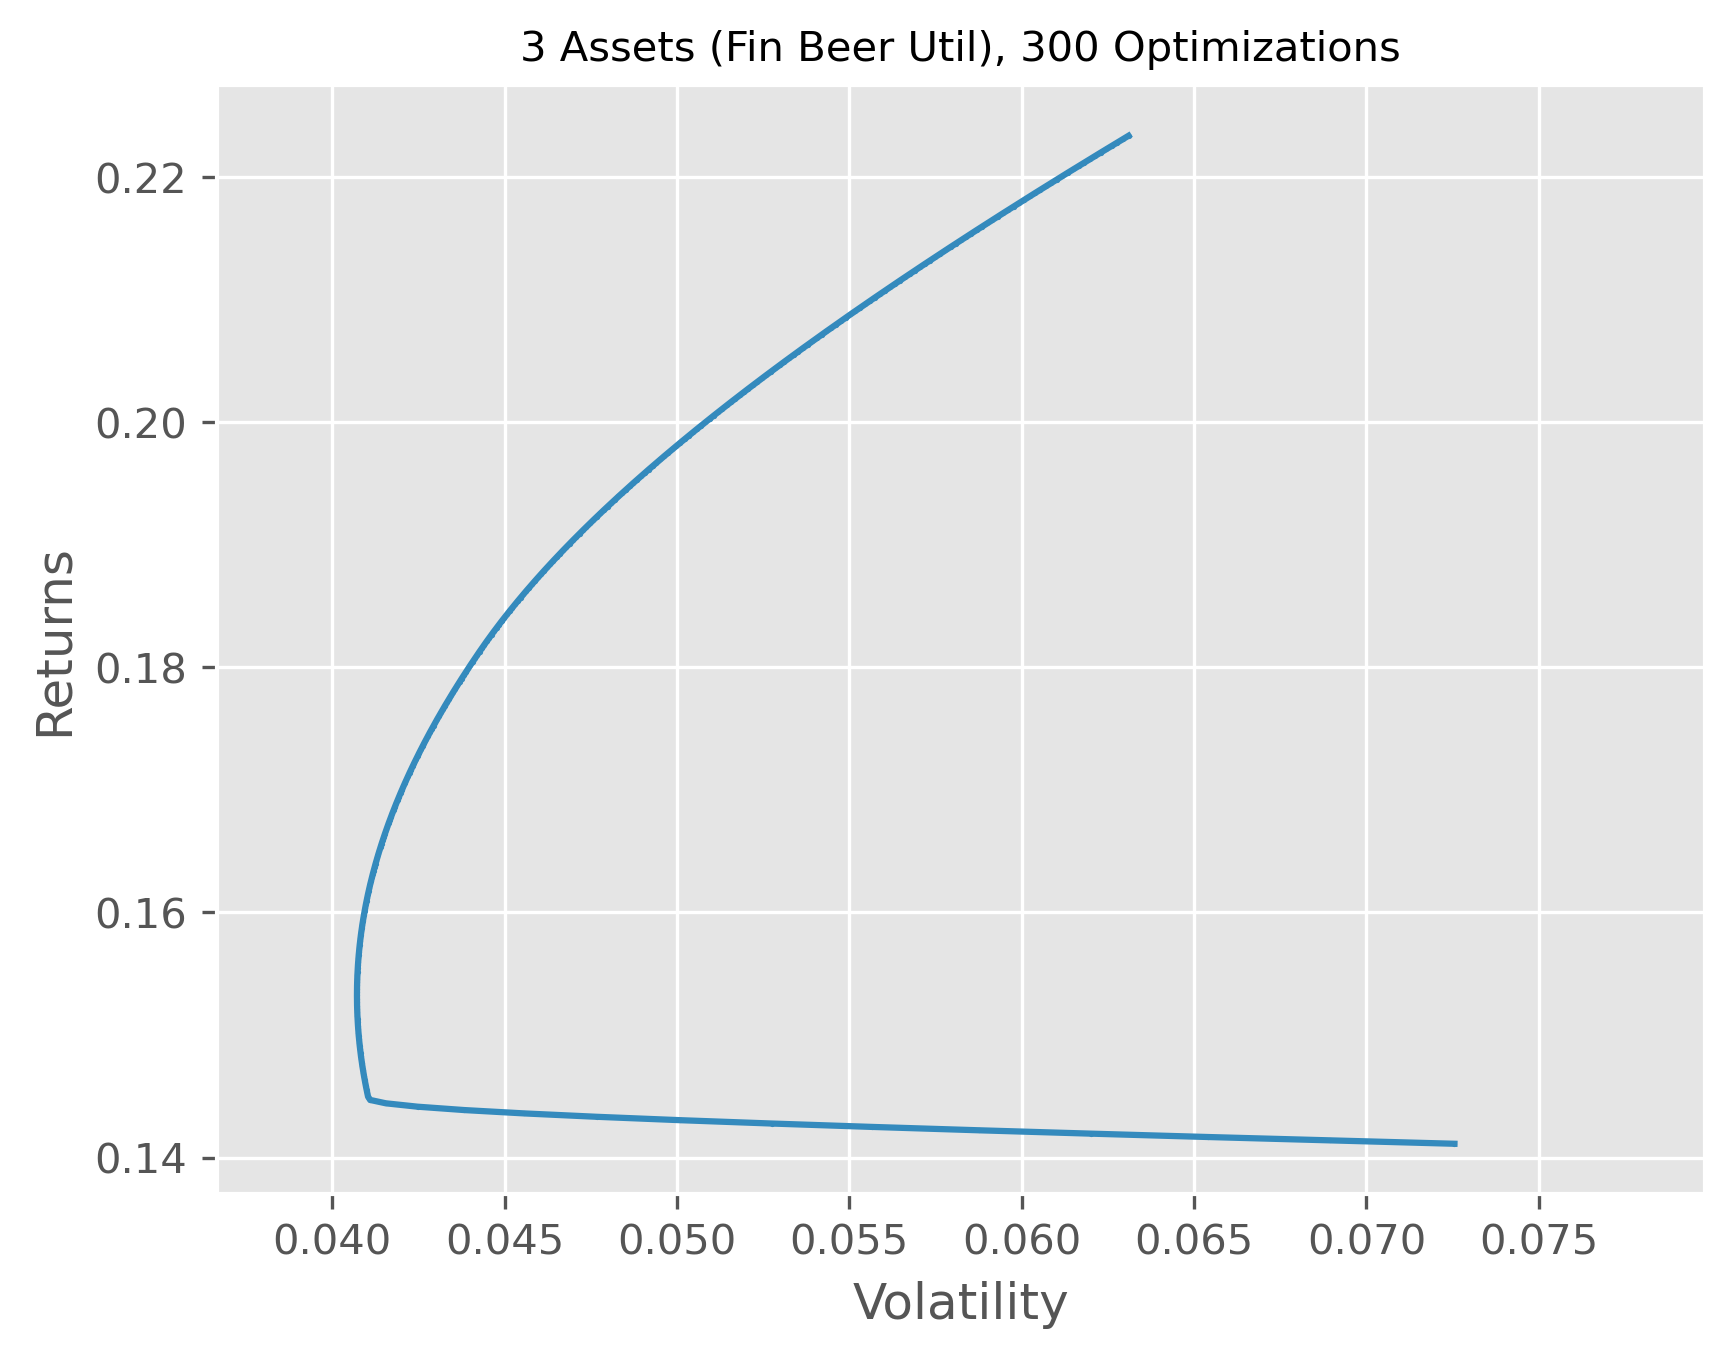

In [17]:
import time

l=["Fin", "Beer", "Util"]
n_opts = 300
title = f'{len(l)} Assets ({" ".join(l)}), {n_opts} Optimizations'

tik = time.time()

print(opt_efn(n_points=n_opts, er=er[l].values, cov=cov.loc[l,l].values, assets_name=l, plot=True))

tok = time.time()

plt.title(title, fontsize=10)

In [18]:
print(f'for {n_opts} times optimizations: {tok-tik}s')

for 300 times optimizations: 0.7436892986297607s


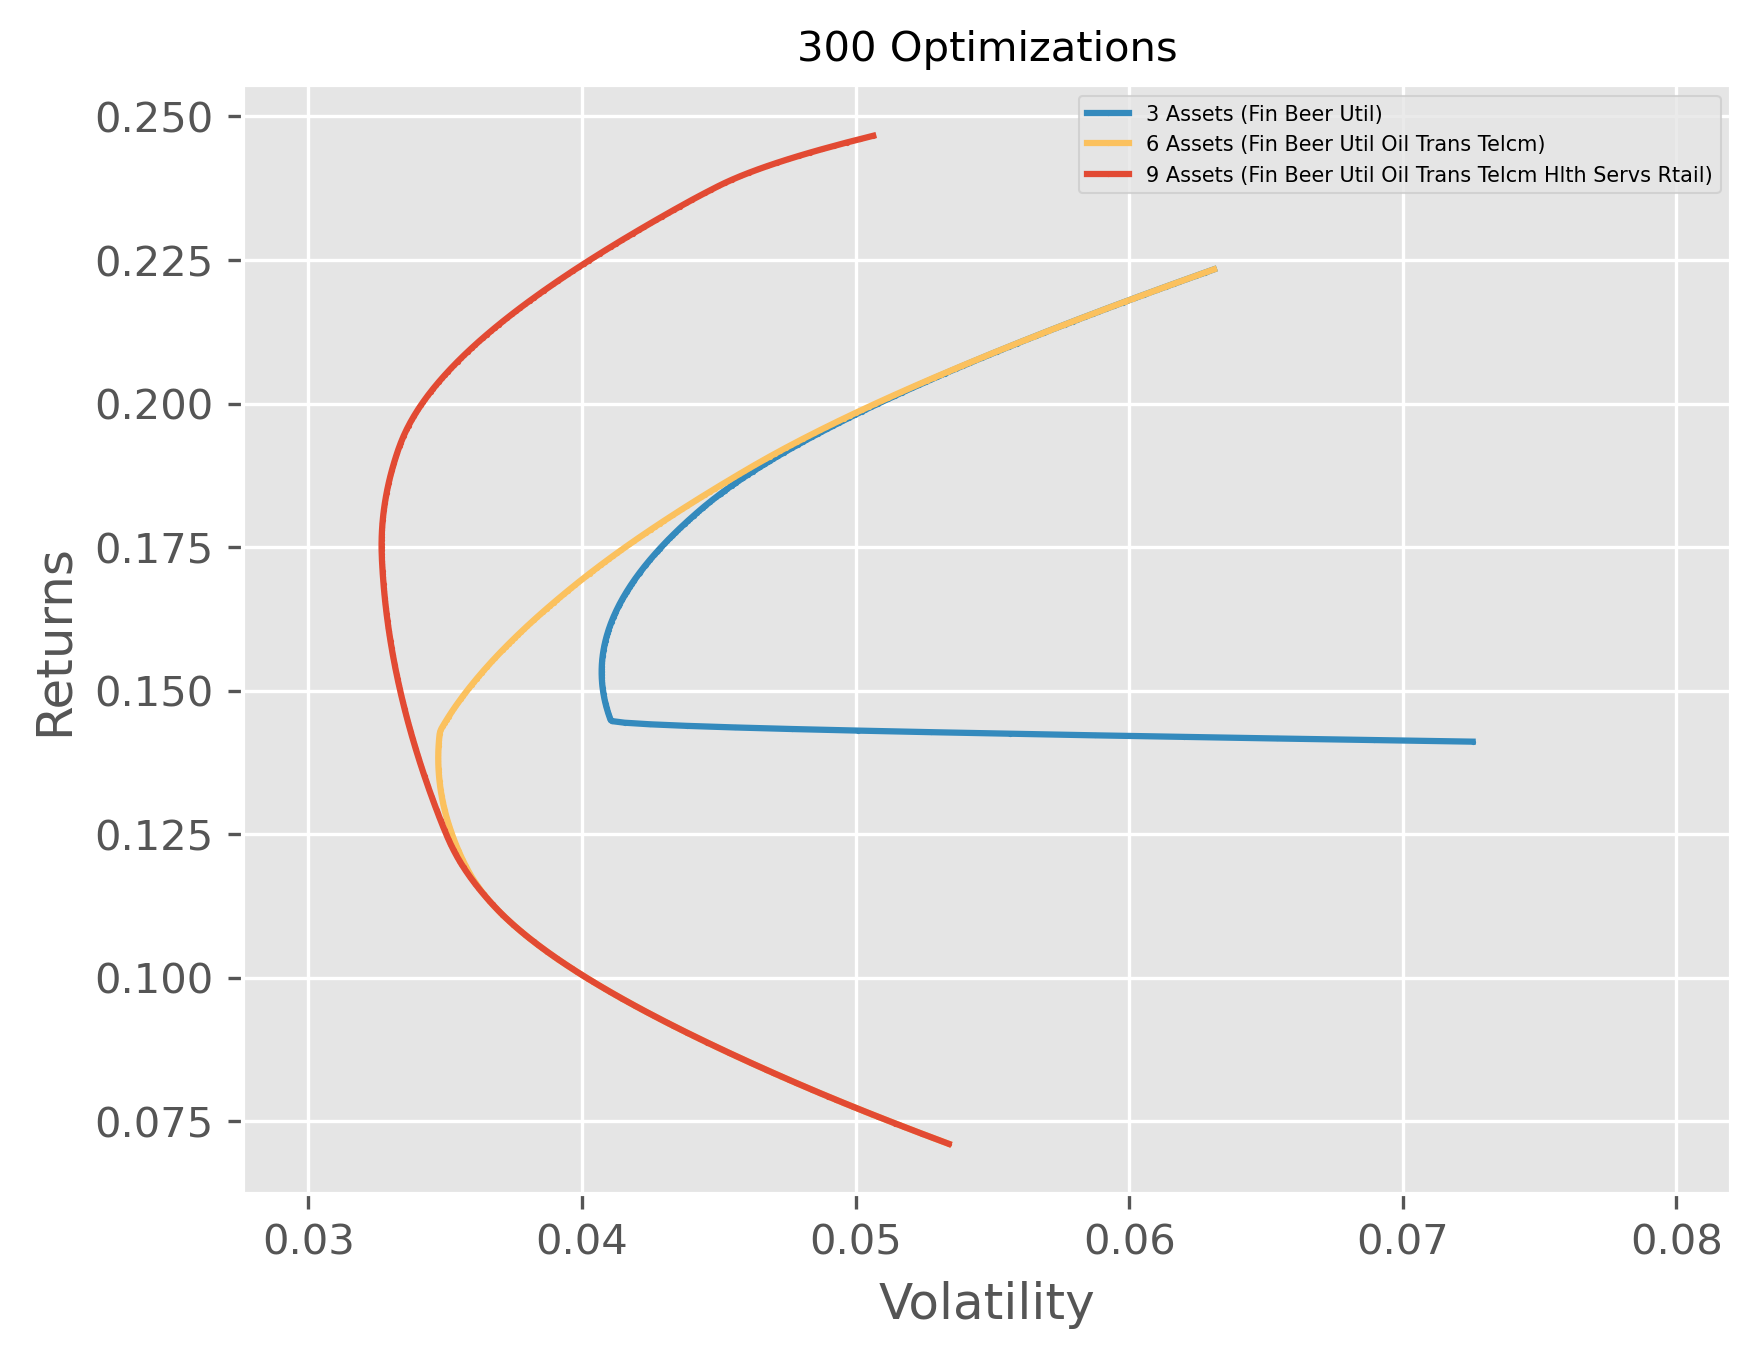

In [19]:
lst = ["Fin", "Beer", "Util", "Oil", "Trans", "Telcm", "Hlth", "Servs", "Rtail"]
colors = ['C1', 'C4', 'C0']
fig, ax = plt.subplots()
n_opts = 300

for i in range(3):
    ind = (i+1) * 3
    l = lst[:ind]
    label = f"{len(l)} Assets ({' '.join(l)})"
    opt_efn(n_points=n_opts, er=er[l].values, cov=cov.loc[l,l].values, plot=True, ax=ax, color=colors[i], label=label)

plt.title(f'{n_opts} Optimizations', fontsize=10)
plt.legend(fontsize=5, loc='upper right')

### Simulation and Optimization

In [20]:
def sim_opt_plot(n_points_sim, n_points_opt, er, cov, ax=None):
    '''
    Plot the simulation result and optimization result of same portfolio on the same figure.
    '''
    if ax:
        sim_efn(n_points=n_points_sim, er=er, cov=cov, plot=True, ax=ax, color='C4', label='Simulation')
        opt_efn(n_points=n_points_opt, er=er, cov=cov, plot=True, ax=ax, label='Optimization')
        ax.set_xlabel('Volatility')
        ax.set_ylabel('Returns')

    else:
        fig, ax = plt.subplots()
        sim_efn(n_points=n_points_sim, er=er, cov=cov, plot=True, ax=ax, color='C4', label='Simulation')
        opt_efn(n_points=n_points_opt, er=er, cov=cov, plot=True, ax=ax, label='Optimization')
        ax.set_xlabel('Volatility')
        ax.set_ylabel('Returns')

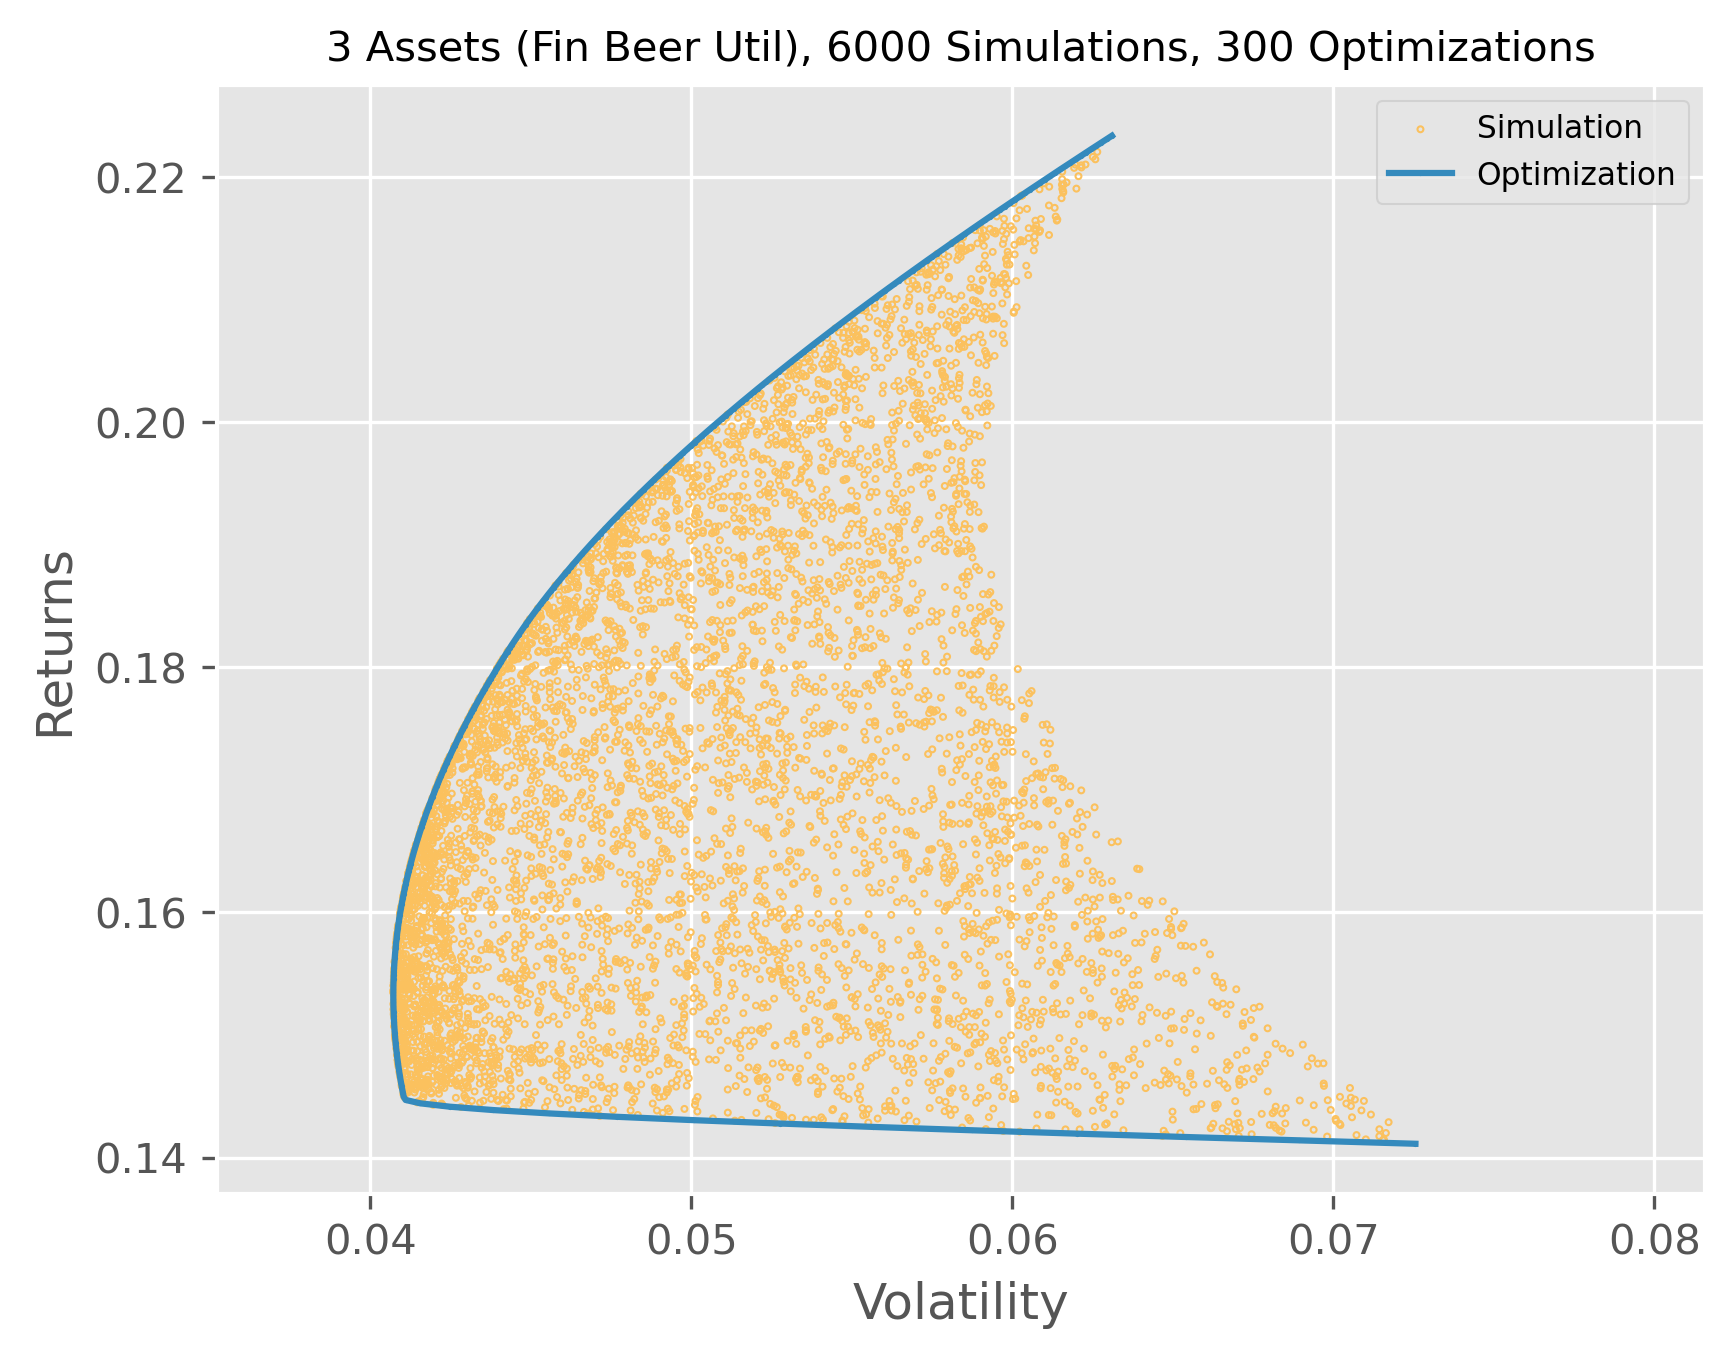

In [21]:
l=["Fin", "Beer", "Util"]
n_sims = 6000
n_opts = 300
title = f"{len(l)} Assets ({' '.join(l)}), {n_sims} Simulations, {n_opts} Optimizations"
sim_opt_plot(n_points_sim=n_sims, n_points_opt=n_opts, er=er[l].values, cov=cov.loc[l,l].values)
plt.title(title, fontsize=10)
plt.legend(fontsize=7.5)

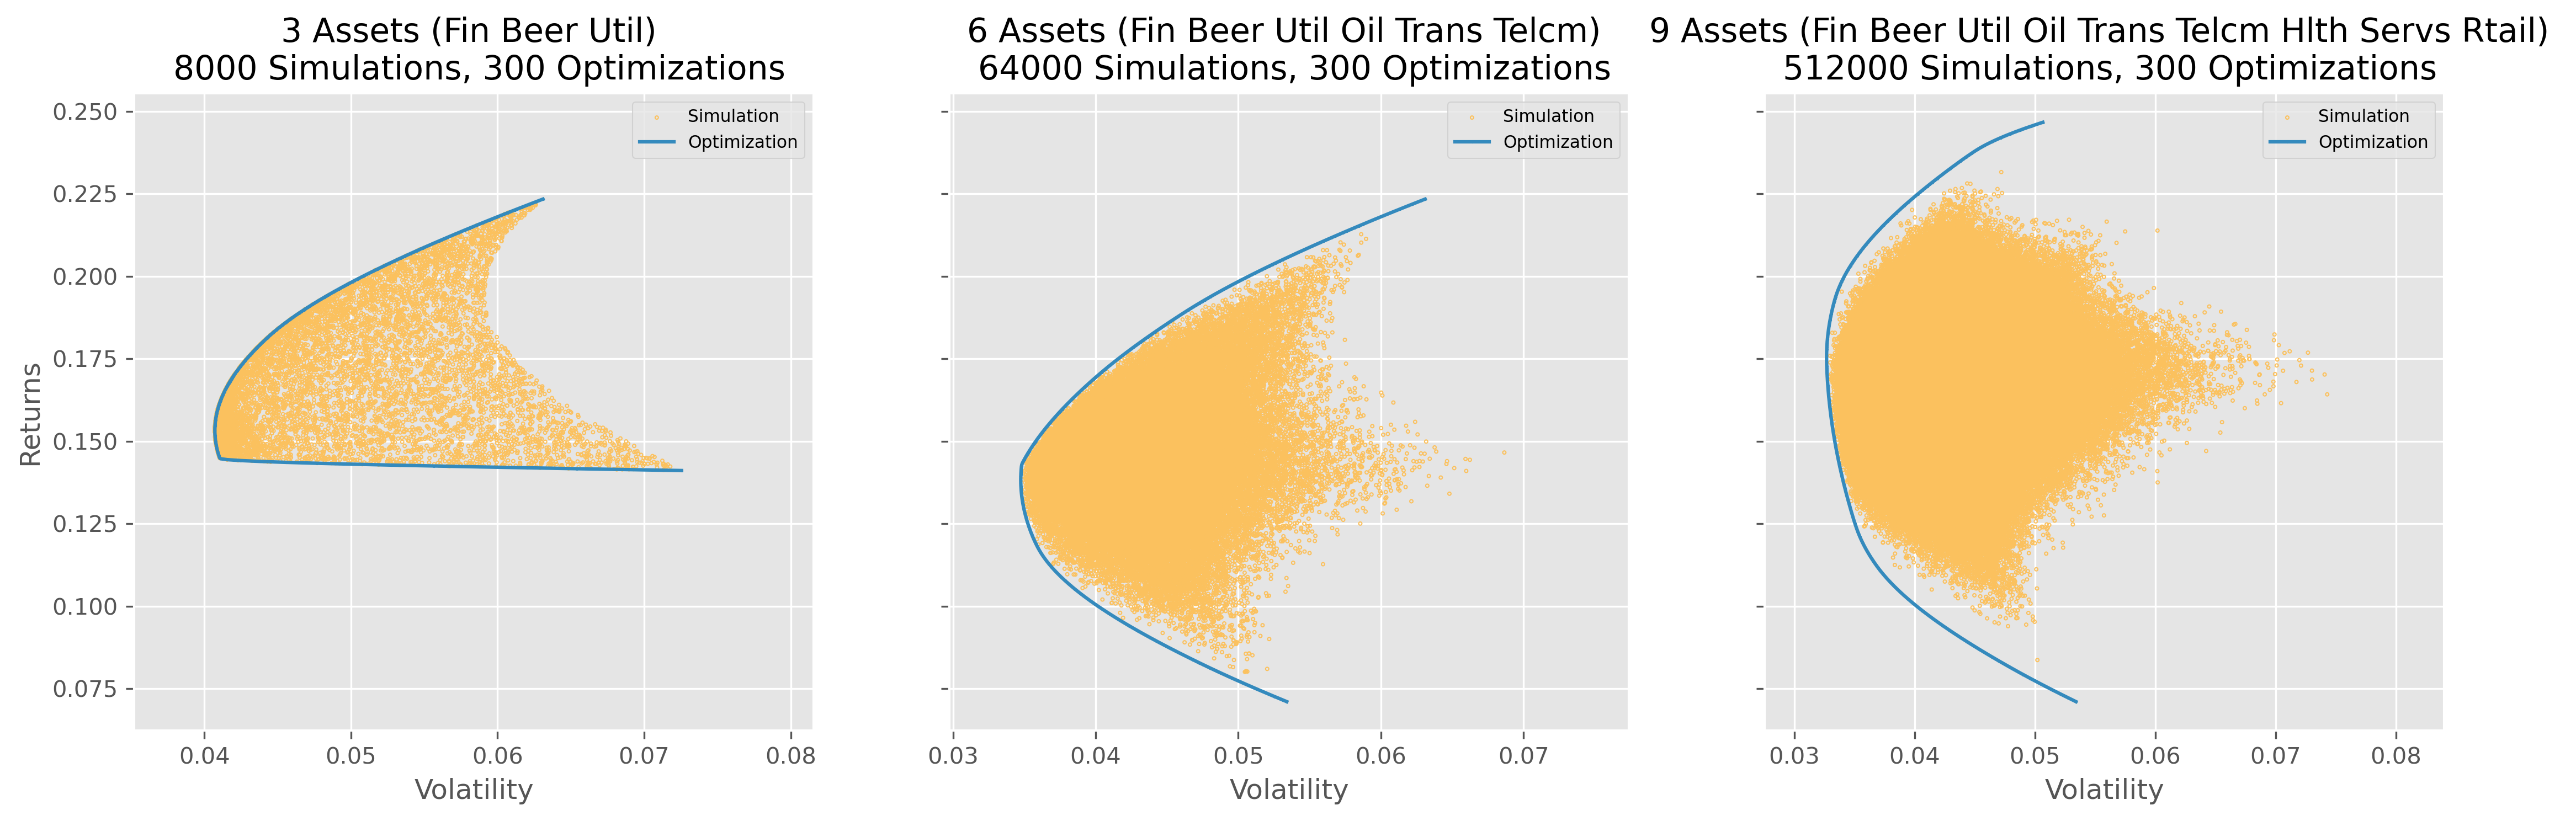

In [22]:
lst = ["Fin", "Beer", "Util", "Oil", "Trans", "Telcm", "Hlth", "Servs", "Rtail"]

fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

for i in range(3):
    ind = (i+1) * 3
    l = lst[:ind]
    n_sims = 1000 * 2**(len(l))
    n_opts = 300
    label = ' '.join(l)
    title = f'{len(l)} Assets ({label}) \n {n_sims} Simulations, {n_opts} Optimizations'
    sim_opt_plot(n_points_sim=n_sims, n_points_opt=n_opts, er=er[l].values, cov=cov.loc[l,l].values, ax=axes[i])
    axes[i].set_title(title)
    axes[i].legend(fontsize=7.5)
    axes[i].set(adjustable='box')

## Replace with equity and bond ETFs (Required)

In [23]:
Ret= pd.read_csv("Return_ETFs.csv")
Ret.set_index(['date'], inplace=True)
Ret.head(10)

BLCN      KURE       XSD
date                                   
2018/3/1  -0.041171  0.116298 -0.016564
2018/4/1   0.002656 -0.019809 -0.042678
2018/5/1   0.022075  0.126123  0.115253
2018/6/1  -0.029806 -0.102692 -0.034091
2018/7/1   0.020926 -0.065926  0.030727
2018/8/1   0.029568 -0.055115  0.059084
2018/9/1   0.002838 -0.049098 -0.037530
2018/10/1 -0.102851 -0.126214 -0.113424
2018/11/1  0.004943  0.057071  0.051857
2018/12/1 -0.091122 -0.175824 -0.086029

In [24]:
er=annualize_rets(Ret, 12)
cov = Ret.cov()

In [25]:
er

BLCN   -0.005145
KURE   -0.002679
XSD     0.214972
dtype: float64

In [26]:
cov

BLCN      KURE       XSD
BLCN  0.006153  0.002686  0.005726
KURE  0.002686  0.008227  0.003182
XSD   0.005726  0.003182  0.008124

### Two assets case

Text(0.5, 1.0, '2 Assets, 300 Simulations')

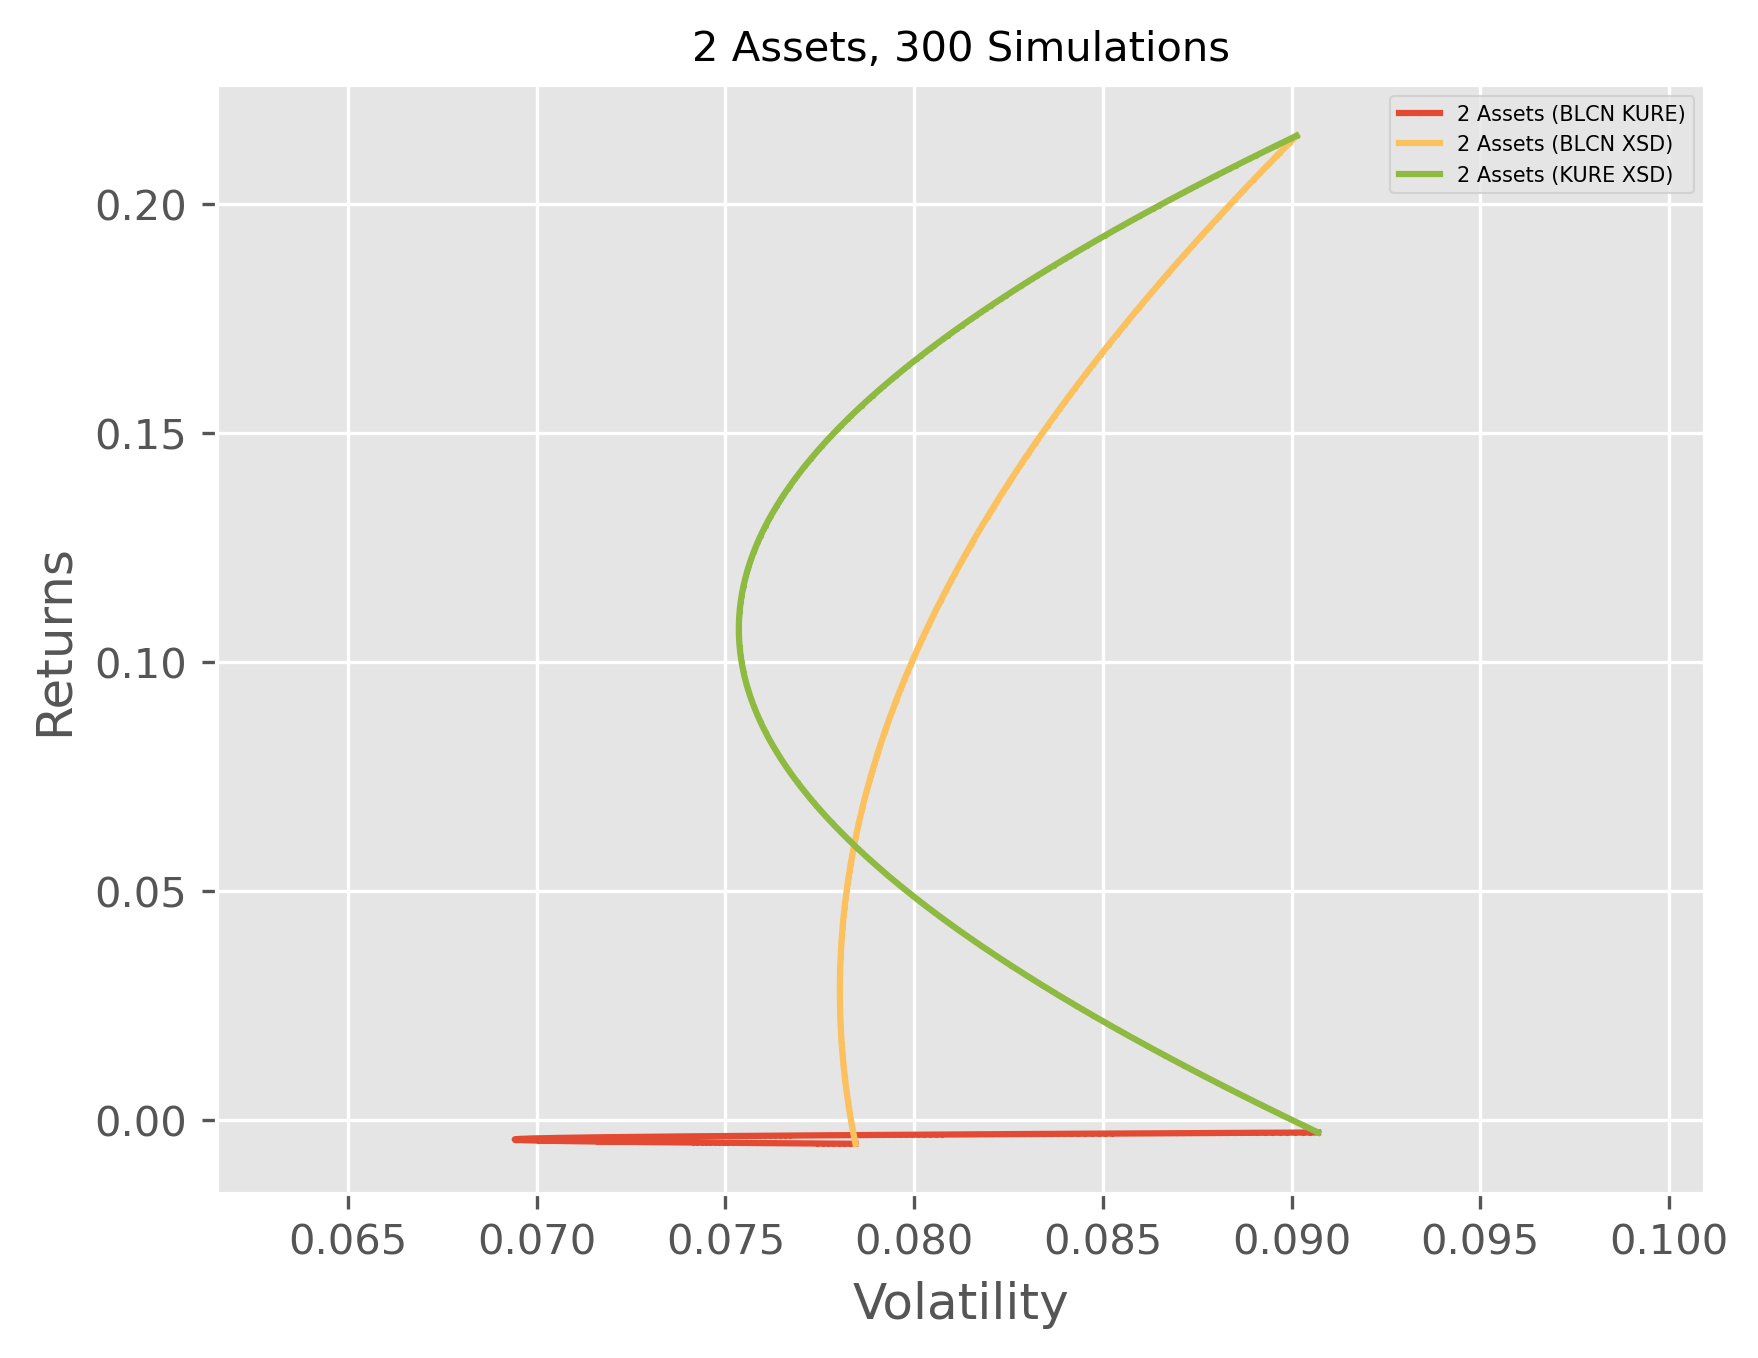

In [27]:
from itertools import combinations
lst = Ret.columns

n_sims = 300
fg, ax = plt.subplots()
colors = ['C0', 'C4', 'C5']
i = 0

for l in combinations(lst, 2):
    l = list(l) 
    label = f'{len(l)} Assets ({" ".join(l)})'
    sim_efn(n_points=n_sims, er=er[l].values, cov=cov.loc[l,l].values, plot=True, ax=ax, color=colors[i], size=0.5, label=label)
    i += 1
    
plt.legend(fontsize=5, loc='upper right')
plt.title(f'2 Assets, {n_sims} Simulations', fontsize=10)

### Multiple assets case

Text(0.5, 1.0, '3 Assets (BLCN KURE XSD), 6000 Simulations')

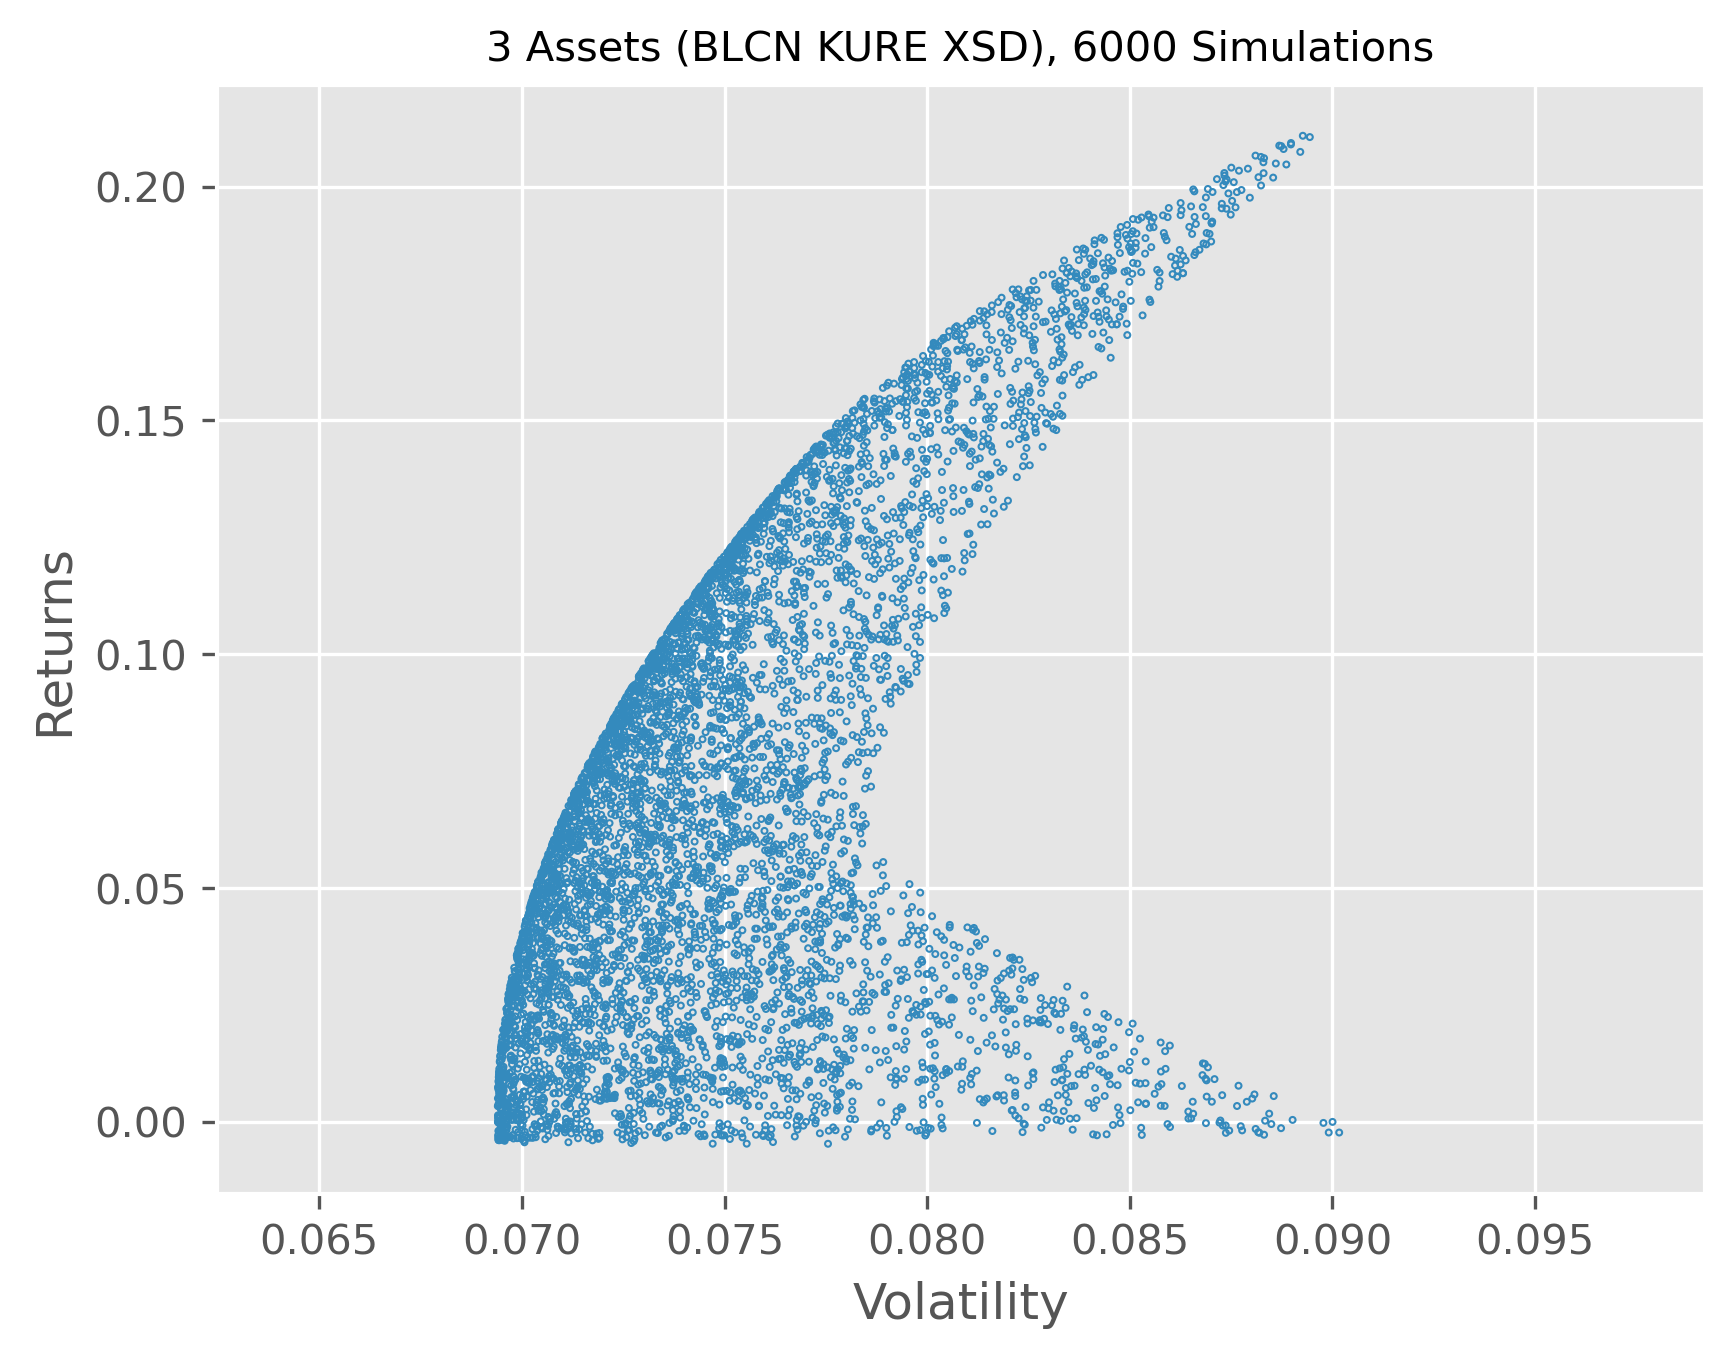

In [28]:
# Simulation
l = Ret.columns
n_sims = 6000
sim_efn(n_points=n_sims, er=er[l].values, cov=cov.loc[l,l].values, plot=True)
plt.title(f'{len(l)} Assets ({" ".join(l)}), {n_sims} Simulations', fontsize=10)

[None]

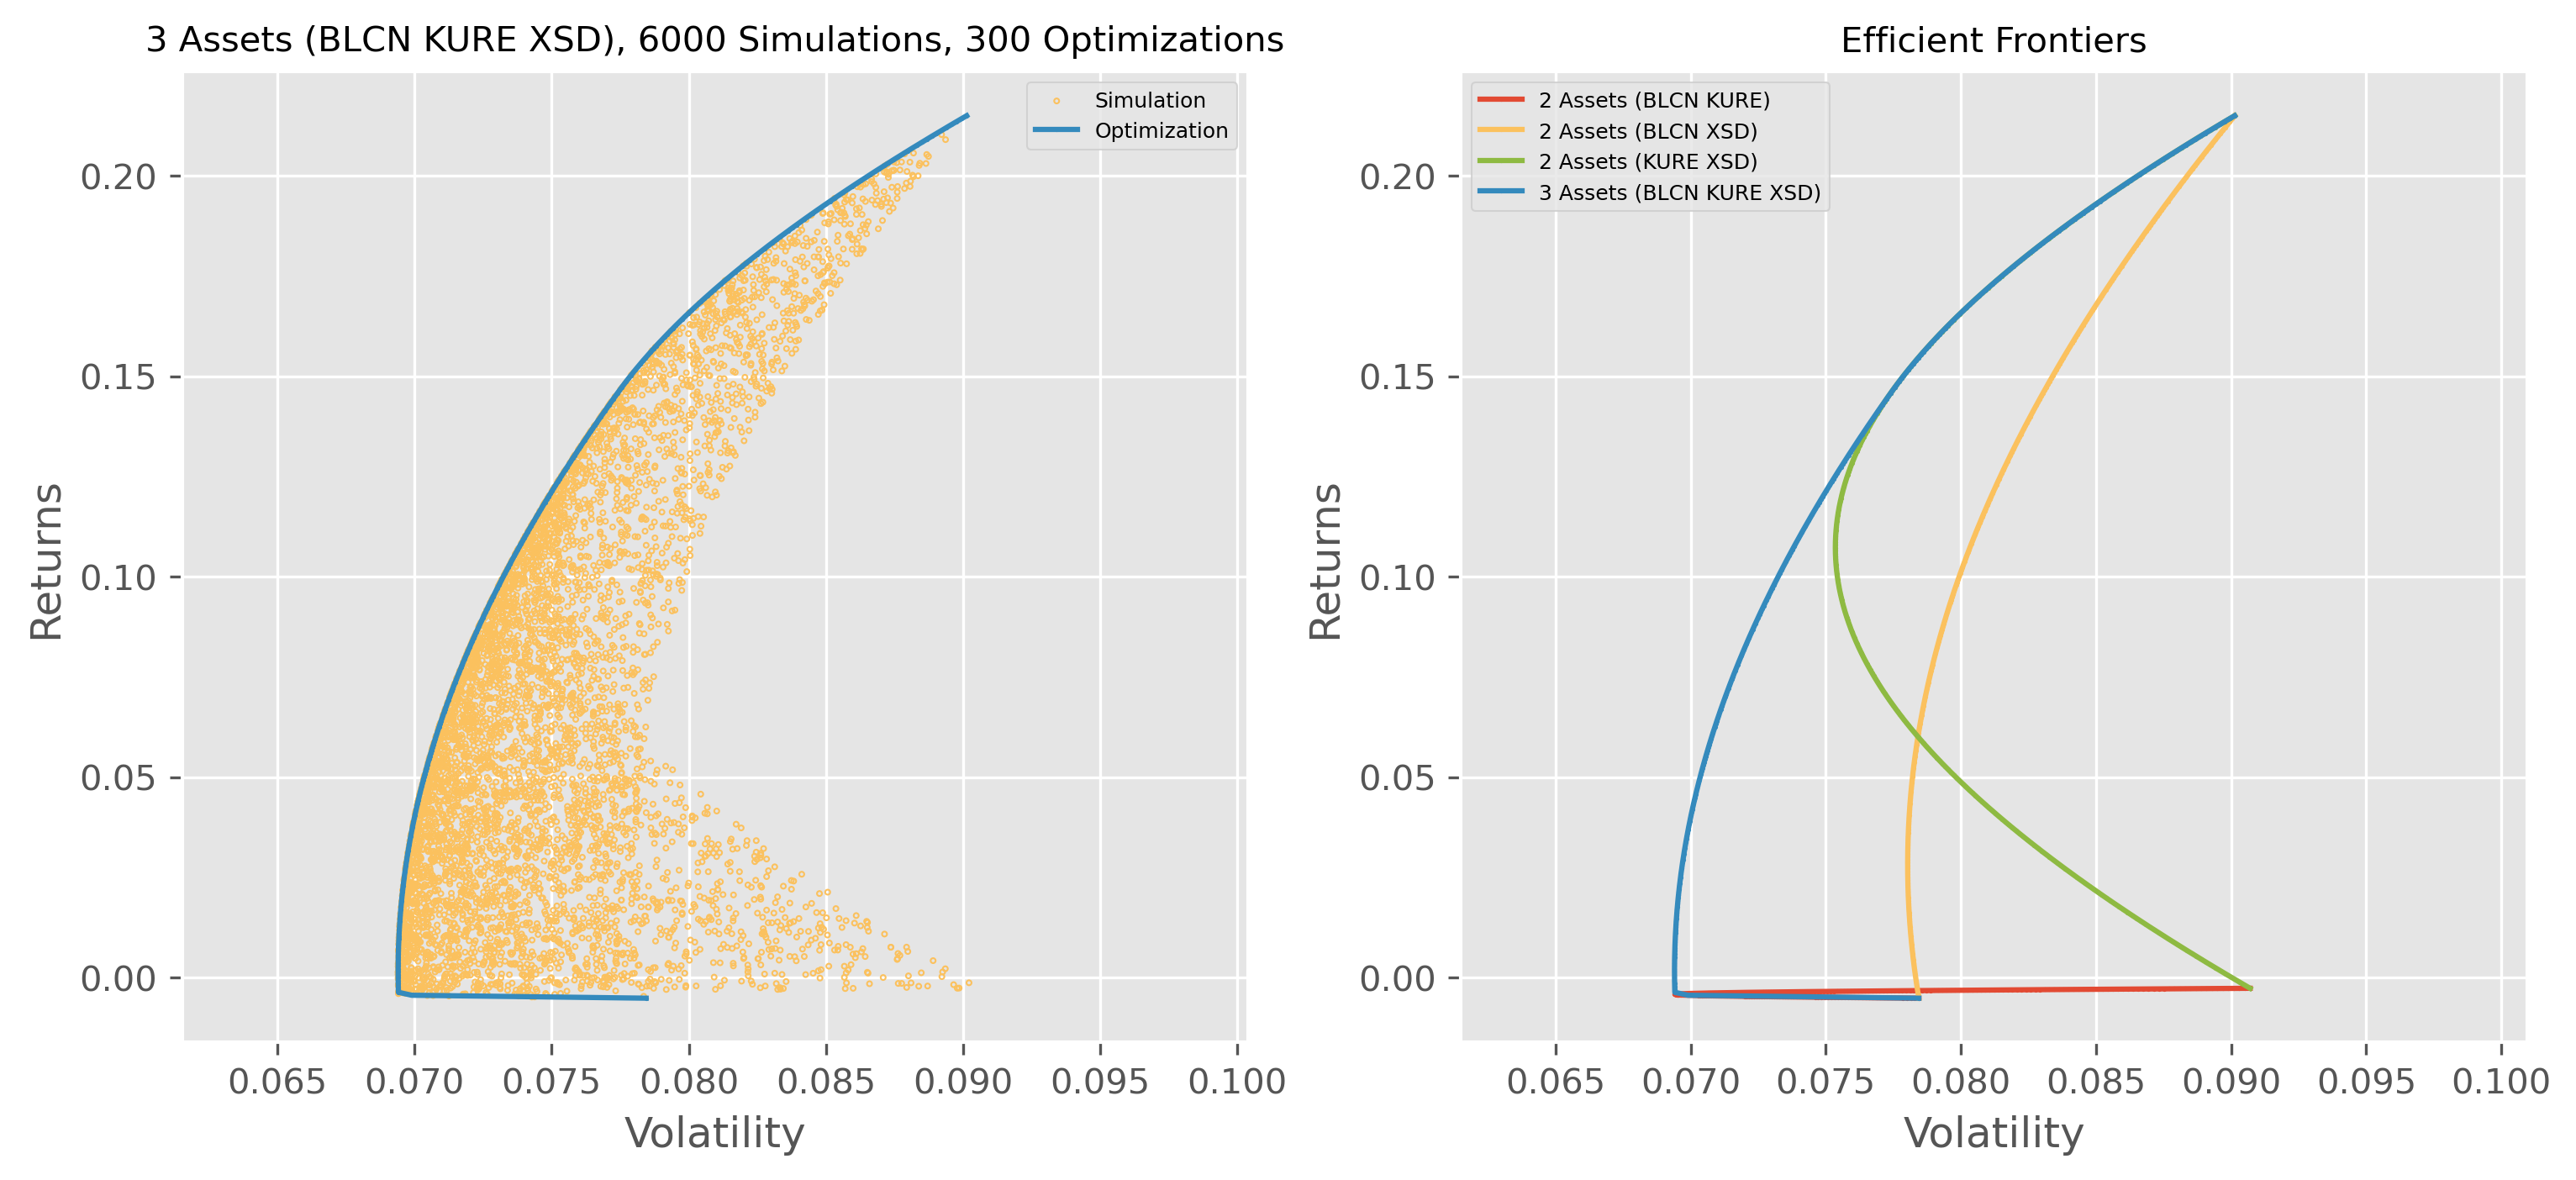

In [29]:
from itertools import combinations

fg, axes = plt.subplots(1, 2, figsize=(12, 5))

# simulation and optimization
l = Ret.columns
n_sims = 6000
n_opts = 300

title = f"{len(l)} Assets ({' '.join(l)}), {n_sims} Simulations, {n_opts} Optimizations"
sim_opt_plot(n_points_sim=n_sims, n_points_opt=n_opts, er=er[l].values, ax=axes[0], cov=cov.loc[l,l].values)
axes[0].set_title(title, fontsize=10)
axes[0].legend(fontsize=6)
axes[0].set(adjustable='box')

# 3 assets case and 2 assets cases
lst = Ret.columns
n_sims = 300
colors = ['C0', 'C4', 'C5']
i = 0

for l in combinations(lst, 2):
    l = list(l) 
    label = f'{len(l)} Assets ({" ".join(l)})'
    sim_efn(n_points=n_sims, er=er[l].values, cov=cov.loc[l,l].values, plot=True,\
            ax=axes[1], size=0.5, color=colors[i], label=label)
    i += 1

n_opts = 300
label = f'{len(lst)} Assets ({" ".join(lst)})'
opt_efn(n_points=n_opts, er=er[lst].values, cov=cov.loc[lst,lst].values, plot=True,\
        ax=axes[1], size=0.5, color='C1', label=label)
axes[1].legend(fontsize=6, loc='upper left')
axes[1].set_title('Efficient Frontiers', fontsize=10)
axes[1].set(adjustable='box')

## Discussion (Required)
Simulate for several different settings, e.g. different compositions of assets, and report the changing trend of the efficient frontier. State your observations and analysis in the report with the help of reasonable visualizations. For example, once you observe a forward shift in the effective frontier after adding / changing a new asset, try to figure out the underlying reasons.

### How $\rho$ affects diversification benefit

In [30]:
! pip install sympy

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [31]:
lst = ['BLCN', 'XSD', 'KURE']
corr = Ret.corr().loc[lst, lst]
cov = Ret.cov().loc[lst, lst]

In [32]:
std_0 = Ret.BLCN.std()
var_0 = Ret.BLCN.var()
std_1 = Ret.XSD.std()
var_1 = Ret.XSD.var()
std_2 = Ret.KURE.std()
var_2 = Ret.KURE.var()
corr_01 = corr.iloc[0,1]
corr_02 = corr.iloc[0,2]
corr_12 = corr.iloc[1,2]

#### Two assets 

Let's consider a portfolio of BLCN and XSD, and see how the efficient frontier change as the correlation varies.

In [33]:
# orginal covariance matrix
l = ['BLCN', 'XSD'] 
cov.loc[l, l]

BLCN       XSD
BLCN  0.006153  0.005726
XSD   0.005726  0.008124

In [34]:
# orginal correlation matrix
l = ['BLCN', 'XSD'] 
corr.loc[l, l]

BLCN       XSD
BLCN  1.000000  0.809868
XSD   0.809868  1.000000

Text(0.5, 1.0, 'Efficient Frontiers (BLCN XSD)')

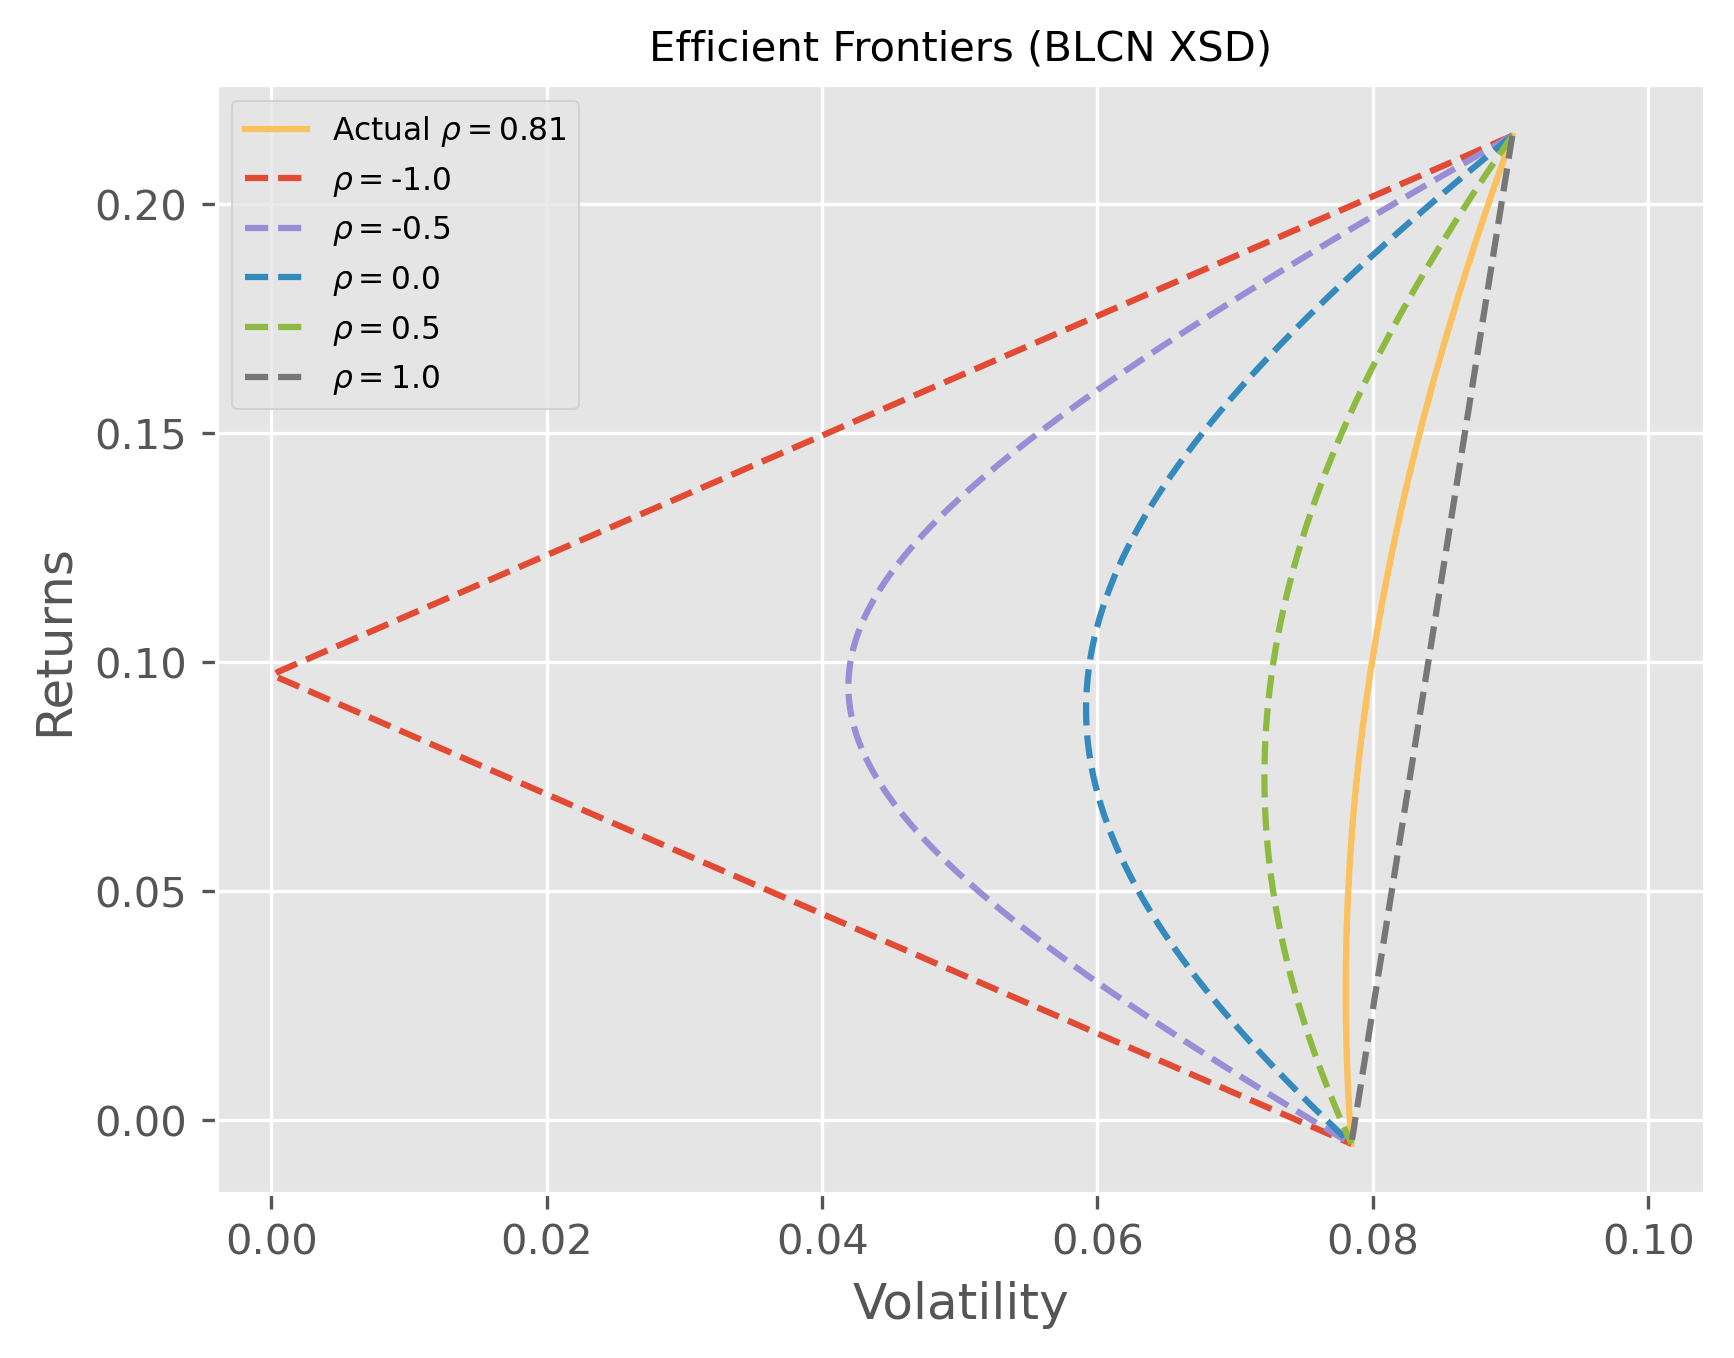

In [35]:
l = ['BLCN', 'XSD'] 
fig, ax = plt.subplots()
rho_true = corr.loc[l[0], l[1]]
label = 'Actual ' + r'$\rho=$' + f'{np.round(rho_true, 2)}'
sim_efn(n_points=300, er=er[l].values, cov=cov.loc[l,l].values, plot=True, ax=ax, size=0.5, color='C4', label=label)

colors = ['C0', 'C2', 'C1', 'C5', 'C3']
i = 0
for rho in np.linspace(-1, 1, 5):
    rho = np.round(rho, 2)
    val = rho * std_0 * std_1
    cov_ = cov.loc[l, l].values
    cov_[0,1] = val
    cov_[1,0] = val
    label = r'$\rho=$' + f'{rho}'
    sim_efn(n_points=300, er=er[l].values, cov=cov_, plot=True, ax=ax,\
                size=0.5, color=colors[i], linstyle='--', label=label)
    i += 1

plt.legend(fontsize=7.5)
plt.title(f'Efficient Frontiers ({" ".join(l)})', fontsize=10)

#### Three assets

Let's consider a portfolio of BLCN, XSD and KURE, and see how the efficient frontier change as the correlation between (BLCN, KURE) and (XSD, KURE) varies.

In [36]:
cov

BLCN       XSD      KURE
BLCN  0.006153  0.005726  0.002686
XSD   0.005726  0.008124  0.003182
KURE  0.002686  0.003182  0.008227

In [37]:
corr

BLCN       XSD      KURE
BLCN  1.000000  0.809868  0.377464
XSD   0.809868  1.000000  0.389213
KURE  0.377464  0.389213  1.000000

In [38]:
import sympy as sp

rho_02, rho_12 = sp.symbols('rho_02 rho_12')

covmat = sp.Matrix([[var_0, cov.iloc[0,1], rho_02*std_0*std_2], 
                    [cov.iloc[0,1], var_1, rho_12*std_1*std_2], 
                    [rho_02*std_0*std_2, rho_12*std_1*std_2, var_2]])
expr = covmat.det() # determinant of covariance matrix
expr

-4.11240648036391e-7*rho_02**2 + 6.66101142167043e-7*rho_02*rho_12 - 4.11240648036392e-7*rho_12**2 + 1.41513704873798e-7

Text(0.5, 1.0, 'Efficient Frontiers (Actual)')

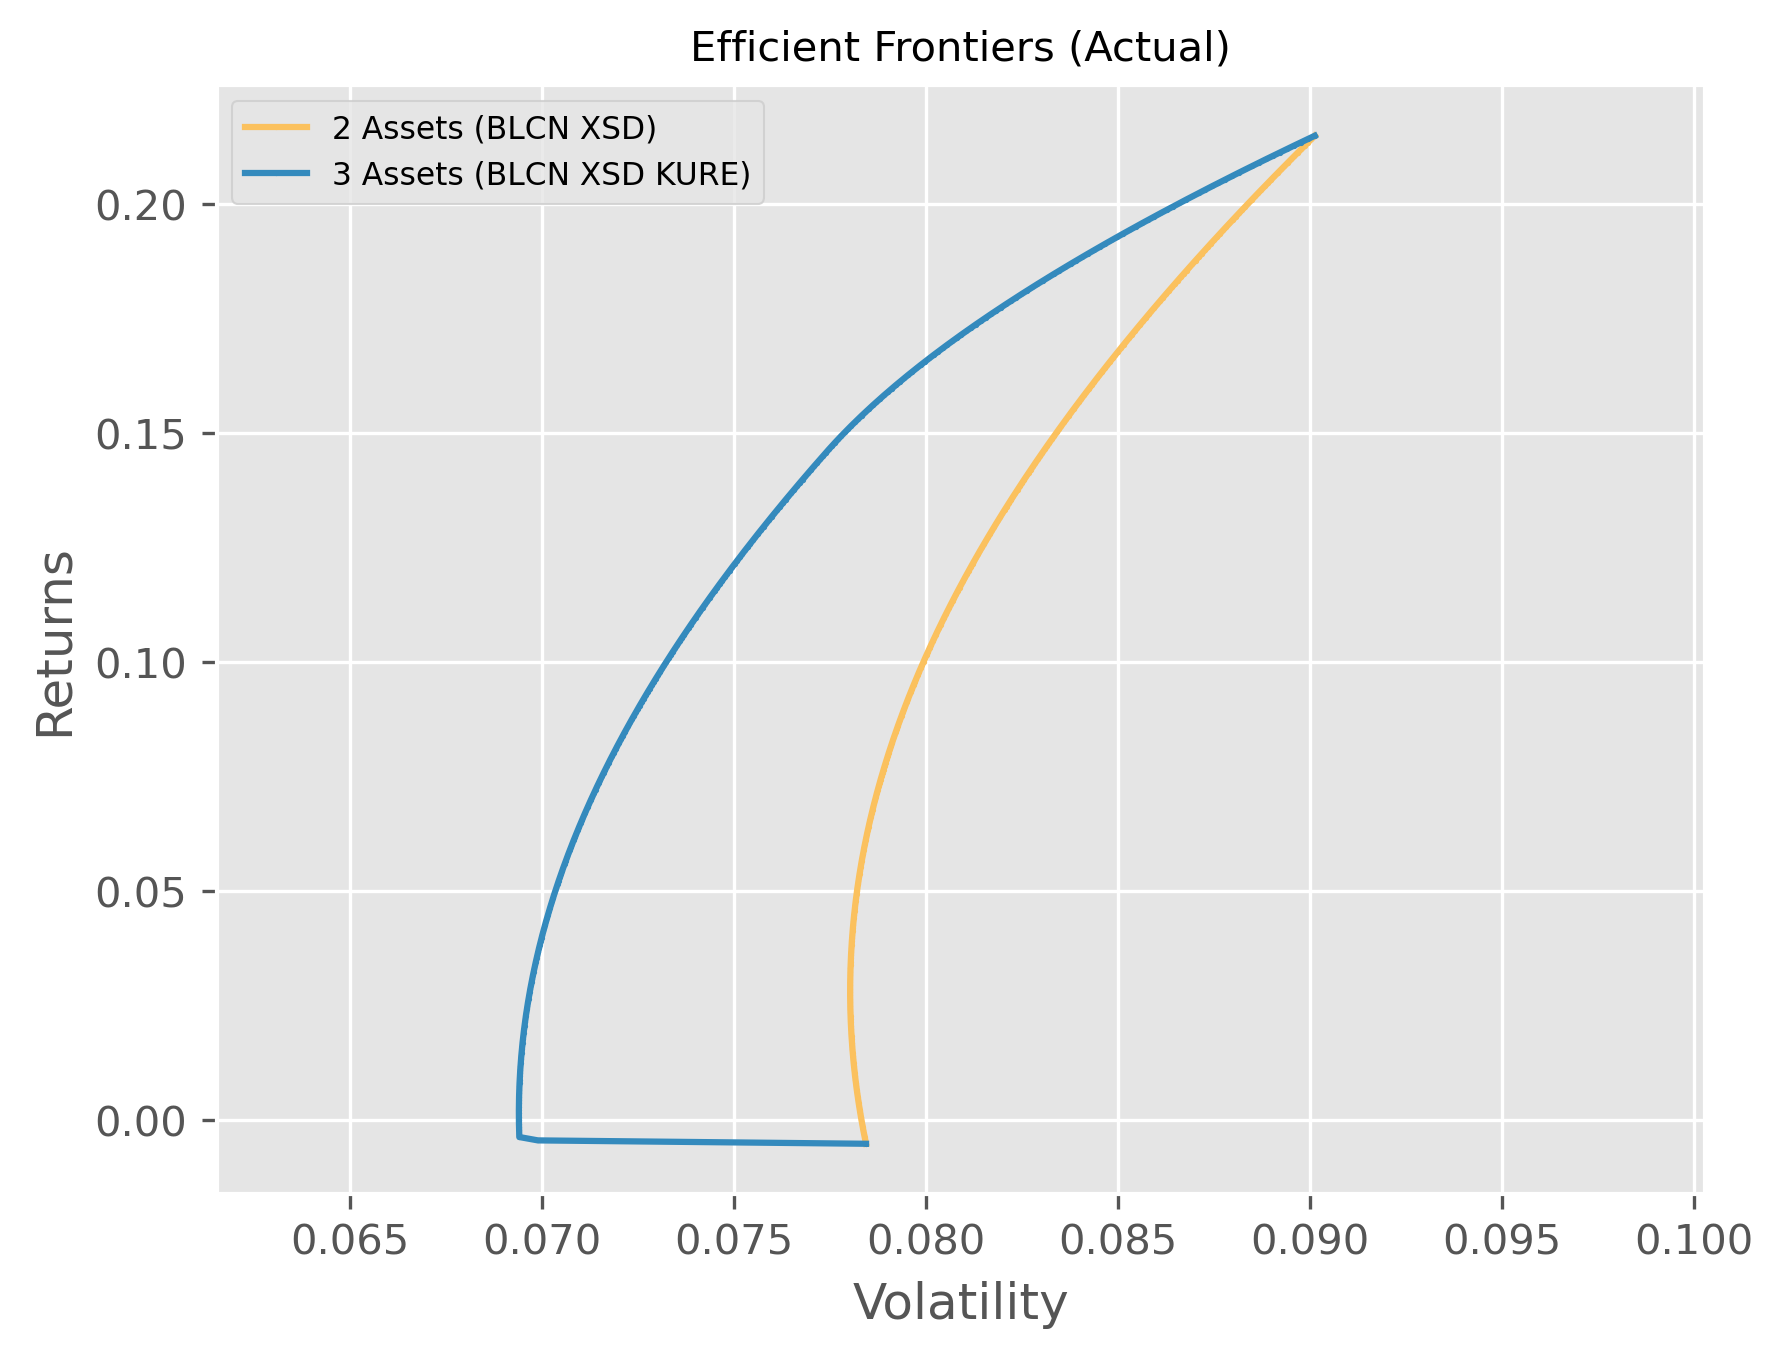

In [39]:
fig, ax = plt.subplots()

l = ['BLCN', 'XSD']
label = f'{len(l)} Assets ({" ".join(l)})'
sim_efn(n_points=300, er=er[l].values, cov=cov.loc[l,l].values, plot=True, ax=ax, size=0.5, color='C4', label=label)


lst = ['BLCN', 'XSD', 'KURE']
label = f'{len(lst)} Assets ({" ".join(lst)})'
opt_efn(n_points=300, er=er[lst].values, cov=cov.loc[lst,lst].values, plot=True, ax=ax, size=0.5, color='C1', label=label)

ax.legend(fontsize=7.5)
ax.set_title('Efficient Frontiers (Actual)', fontsize=10)

[None]

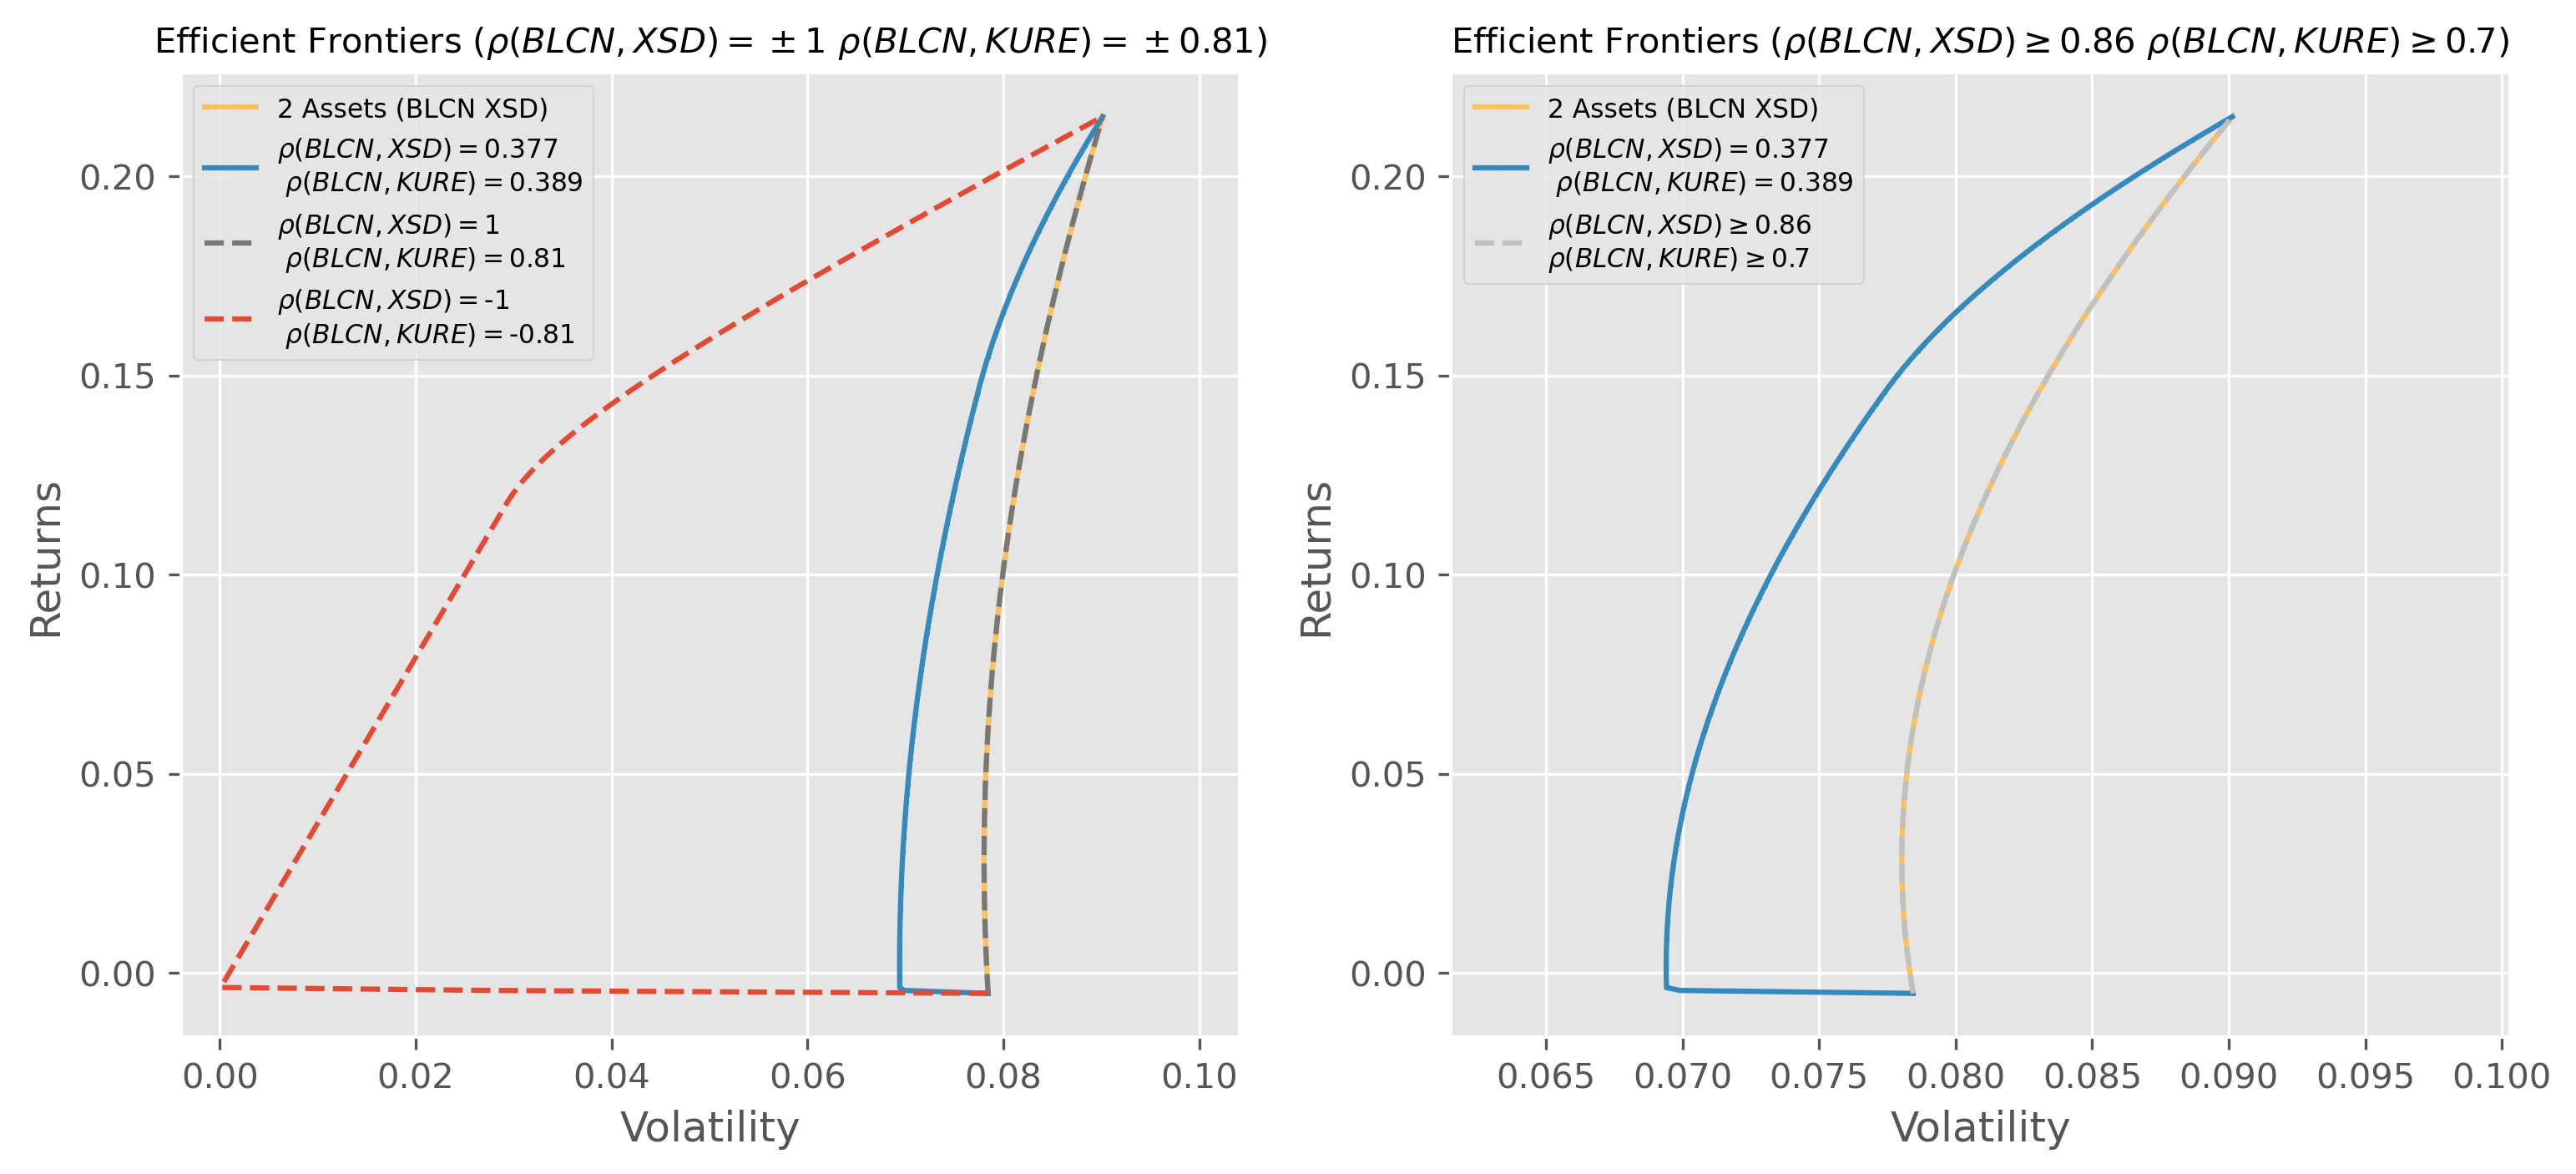

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# axes[0]

l = ['BLCN', 'XSD']
label = f'{len(l)} Assets ({" ".join(l)})'
sim_efn(n_points=300, er=er[l].values, cov=cov.loc[l,l].values, plot=True, ax=axes[0], size=0.5, color='C4', label=label)

lst = ['BLCN', 'XSD', 'KURE']
label =  r'$\rho(BLCN, XSD)=$' + str(round(corr_02, 3)) + '\n' +r' $\rho(BLCN, KURE)=$' + str(round(corr_12, 3))
opt_efn(n_points=300, er=er[lst].values, cov=cov.loc[lst,lst].values, plot=True, ax=axes[0], size=0.5, color='C1', label=label)

colors = ['C3', 'C0']
i = 0
for val_02 in [1, -1]:
    val_12 = np.mean(sp.solve(expr.subs(rho_02, val_02), rho_12))
    val_12 = int(val_12 * 10**6)/10**6
    cov_ = np.array(covmat.subs(rho_02, val_02).subs(rho_12, val_12), dtype=float)
    label = r'$\rho(BLCN, XSD)=$' + str(round(val_02, 3)) + '\n' +r' $\rho(BLCN, KURE)=$' + str(round(val_12, 3))
    opt_efn(n_points=300, er=er[lst].values, cov=cov_, plot=True, ax=axes[0], size=0.5, color=colors[i],\
            linstyle='--', label=label)
    i = i+1


axes[0].legend(fontsize=7.5)
axes[0].set_title(r'Efficient Frontiers ($\rho(BLCN, XSD)=\pm 1$ $\rho(BLCN, KURE)=\pm 0.81$)', fontsize=10)
axes[0].set(adjustable='box')

# axes[1]

l = ['BLCN', 'XSD']
label = f'{len(l)} Assets ({" ".join(l)})'
sim_efn(n_points=300, er=er[l].values, cov=cov.loc[l,l].values, plot=True, ax=axes[1], size=0.5, color='C4', label=label)

lst = ['BLCN', 'XSD', 'KURE']
label =  r'$\rho(BLCN, XSD)=$' + str(round(corr_02, 3)) + '\n' +r' $\rho(BLCN, KURE)=$' + str(round(corr_12, 3))
opt_efn(n_points=300, er=er[lst].values, cov=cov.loc[lst,lst].values, plot=True, ax=axes[1], size=0.5, color='C1', label=label)

val_02 = 1 - np.random.random()*0.14
val_12 = 1 - np.random.random()*0.3

while expr.subs(rho_02, val_02).subs(rho_12, val_12) < 0:
    val_02 = 1 - np.random.random()*0.14
    val_12 = 1 - np.random.random()*0.3

cov_ = np.array(covmat.subs(rho_02, val_02).subs(rho_12, val_12), dtype=float)
label = r'$\rho(BLCN, XSD) \geq 0.86$' + '\n' + r'$\rho(BLCN, KURE)\geq 0.7$'
opt_efn(n_points=300, er=er[lst].values, cov=cov_, plot=True, ax=axes[1], size=0.5, color='silver', linstyle='--', label=label)

axes[1].legend(fontsize=7.5)
axes[1].set_title(r'Efficient Frontiers ($\rho(BLCN, XSD) \geq 0.86$ $\rho(BLCN, KURE)\geq 0.7$)', fontsize=10)
axes[1].set(adjustable='box')